# Data Pre-Processing

## 1. Code snippet for importing the required data tables and assigning them a data frame using pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcdefaults()

protien_bio_df=pd.read_csv('./protein_biomarker_in plasma_samples.csv') #import protein biomarker information
pt_data_df=pd.read_csv('./patient_data.csv') #import hispathological and clinical characteristics of each patient
mutation_plasma_data_df=pd.read_csv('./mutation_plasma.csv') #import blood plasma and mutation information. 

**Data pre-processing has the following steps on a high level**

* Import acquired data which is in 3 distinct tables into 3 separate data frames. 
    * First table contains protein biomarker information of each patient. This table has 43 columns. 
    * Second table contains information on mutations found in blood plasma. This table has 11 columns
    * Third table contains histopathological and clinical characteristics of the cancer patients and healthy controls. This table has 11 columns. 
    

* Check for data type of each column in all the data frames and get them to the required format. For example, some of the data cells in the protein biomarker concentration have string characters, these have to be converted to appropriate data types. 

* Integrate the 3 disparate dataframes to a single dataframe using the common keys like patient ID and sample ID and remove duplicate features. 

* Check for null values and treat them appropriately. 



### First Table - Protein Biomarker Information

#### Data Features and Types

In [2]:
protien_bio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID #                 1817 non-null   object 
 1   Sample ID #                  1817 non-null   object 
 2   Tumor type                   1817 non-null   object 
 3   AJCC Stage                   1005 non-null   object 
 4   AFP (pg/ml)                  1817 non-null   object 
 5   Angiopoietin-2 (pg/ml)       1817 non-null   object 
 6   AXL (pg/ml)                  1811 non-null   float64
 7   CA-125 (U/ml)                1817 non-null   object 
 8   CA 15-3 (U/ml)               1817 non-null   object 
 9   CA19-9 (U/ml)                1817 non-null   object 
 10  CD44 (ng/ml)                 1811 non-null   object 
 11  CEA (pg/ml)                  1817 non-null   object 
 12  CYFRA 21-1 (pg/ml)           1817 non-null   object 
 13  DKK1 (ng/ml)      

In [3]:
protien_bio_df.head()

,Patient ID #,Sample ID #,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,CRC 455,CRC 455 PLS 1,Colorectum,I,1583.45,5598.5,3621.04,5.09,19.08,*16.452,...,11606.6,3284.17,*204.792,55.06,6832.07,9368.53,*16.086,21863.74,56428.71,39498.82
1,CRC 456,CRC 456 PLS 1,Colorectum,I,*715.308,20936.35,2772.96,7.27,10.04,40.91,...,14374.99,1911.81,*204.792,72.92,5549.47,6224.55,*16.086,29669.66,73940.49,41277.09
2,CRC 457,CRC 457 PLS 1,Colorectum,II,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,...,38375,1743.94,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.28,28440.60
3,CRC 458,CRC 458 PLS 1,Colorectum,II,*715.308,1604.34,2029.96,5.39,8.31,*16.452,...,12072.51,1059.24,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.19,25896.73
4,CRC 459,CRC 459 PLS 1,Colorectum,II,801.3,2087.57,2069.17,*4.854,11.73,*16.452,...,23718.17,1736.92,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.51,49425.20


The protein biomarkers are specified by concentration levels in pg/ml or ng/ml or U/ml which is a floating point data type. But from the above output almost all the columns are being read as object type due to the presence of preceeding string values like * and ** in some of the data cells. These appear randomly in some of the cells and hence they have to be removed through regex and then get them to the required data type which is floating point. 

#### Data Cleaning through Regex and required Datatype Conversion

## 2. Code to Clean Data for Protein Biomarker Table.  

In [4]:
for each in protien_bio_df:
    if each not in ['Patient ID #','Sample ID #','Tumor type','AJCC Stage','CancerSEEK Test Result']:
        if type(protien_bio_df[each][0])==str:
            protien_bio_df[each]=protien_bio_df[each].str.extract('(\d*\.?\d+)')
        protien_bio_df[each] = pd.to_numeric(protien_bio_df[each])

In [5]:
protien_bio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID #                 1817 non-null   object 
 1   Sample ID #                  1817 non-null   object 
 2   Tumor type                   1817 non-null   object 
 3   AJCC Stage                   1005 non-null   object 
 4   AFP (pg/ml)                  1817 non-null   float64
 5   Angiopoietin-2 (pg/ml)       1817 non-null   float64
 6   AXL (pg/ml)                  1811 non-null   float64
 7   CA-125 (U/ml)                1817 non-null   float64
 8   CA 15-3 (U/ml)               1817 non-null   float64
 9   CA19-9 (U/ml)                1817 non-null   float64
 10  CD44 (ng/ml)                 1811 non-null   float64
 11  CEA (pg/ml)                  1817 non-null   float64
 12  CYFRA 21-1 (pg/ml)           1817 non-null   float64
 13  DKK1 (ng/ml)      

In [6]:
protien_bio_df.head()

,Patient ID #,Sample ID #,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,CRC 455,CRC 455 PLS 1,Colorectum,I,1583.450,5598.50,3621.04,5.090,19.08,16.452,...,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82
1,CRC 456,CRC 456 PLS 1,Colorectum,I,715.308,20936.35,2772.96,7.270,10.04,40.910,...,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09
2,CRC 457,CRC 457 PLS 1,Colorectum,II,4365.530,2350.93,4120.77,4.854,16.96,16.452,...,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60
3,CRC 458,CRC 458 PLS 1,Colorectum,II,715.308,1604.34,2029.96,5.390,8.31,16.452,...,12072.51,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73
4,CRC 459,CRC 459 PLS 1,Colorectum,II,801.300,2087.57,2069.17,4.854,11.73,16.452,...,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20


As per the output above the dataframe is now in the required format. 

### Second Table - Histopathological and Clinical characteristics of Cancer Patients and Healthy Controls

In [7]:
pt_data_df.head()

,Patient ID #,Plasma sample ID #,Primary tumor sample ID #,Age,Sex,Race,Tumor type,AJCC Stage,Histopathology,Plasma volume (mL),Plasma DNA concentration (ng/mL)
0,CRC 455,CRC 455 PLS 1,Not available,60,Male,Caucasian,Colorectum,I,Adenocarcinoma,5.0,6.08
1,CRC 456,CRC 456 PLS 1,CRC 456 PT1,59,Female,Caucasian,Colorectum,I,Adenocarcinoma,4.0,46.01
2,CRC 457,CRC 457 PLS 1,CRC 457 PT1,69,Female,Caucasian,Colorectum,II,Adenocarcinoma,4.5,6.94
3,CRC 458,CRC 458 PLS 1,CRC 458 PT1,70,Female,Caucasian,Colorectum,II,Adenocarcinoma,7.5,7.15
4,CRC 459,CRC 459 PLS 1,CRC 459 PT1,43,Female,Caucasian,Colorectum,II,Adenocarcinoma,5.0,9.81


#### Data Features and Types

In [8]:
pt_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient ID #                      1817 non-null   object 
 1   Plasma sample ID #                1817 non-null   object 
 2   Primary tumor sample ID #         1817 non-null   object 
 3   Age                               1817 non-null   int64  
 4   Sex                               1817 non-null   object 
 5   Race                              1817 non-null   object 
 6   Tumor type                        1817 non-null   object 
 7   AJCC Stage                        1005 non-null   object 
 8   Histopathology                    1005 non-null   object 
 9   Plasma volume (mL)                1817 non-null   float64
 10  Plasma DNA concentration (ng/mL)  1817 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 156.3+ KB


This table is relatively clean and the columns are in the appropriate format, so does not require any major preprocessing. However, we change the column name of 'Plasma sample ID #' to 'Sample ID #' to keep it consitent since the same name is used in other tables to specify the sample ID. 

In [9]:
pt_data_df['Sample ID #']=pt_data_df['Plasma sample ID #']
pt_data_df.drop(columns='Plasma sample ID #',inplace=True)

#### Filtering out columns that are required

In [10]:
required=['Sample ID #','Age','Sex','Race','Histopathology','Plasma volume (mL)','Plasma DNA concentration (ng/mL)']
pt_data_df=pt_data_df[required]

### Third Table - Mutations in Blood Plasma

In [11]:
mutation_plasma_data_df.head()

,Patient ID #,Sample ID #,Tumor type,AJCC Stage,Plasma volume (mL),Plasma DNA concentration (ng/mL),Mutation identified in plasma*,Ω score,Mutant allele frequency (%),Mutant fragments/mL plasma
0,CRC 455,CRC 455 PLS 1,Colorectum,I,5.0,6.08,"TP53 p.K120E, c.358A>G",2.96,0.27,5.1
1,CRC 456,CRC 456 PLS 1,Colorectum,I,4.0,46.01,"TP53 p.S240I, c.719G>T",2.45,0.02,3.2
2,CRC 457,CRC 457 PLS 1,Colorectum,II,4.5,6.94,"TP53 p.R202C, c.604C>T",1.22,0.06,1.4
3,CRC 458,CRC 458 PLS 1,Colorectum,II,7.5,7.15,"TP53 p.R248Q, c.743G>A",1.64,0.16,3.6
4,CRC 459,CRC 459 PLS 1,Colorectum,II,5.0,9.81,"TP53 p.A276G, c.827C>G",1.33,0.08,2.5


#### Data Features and types

In [12]:
mutation_plasma_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient ID #                      1817 non-null   object 
 1   Sample ID #                       1817 non-null   object 
 2   Tumor type                        1817 non-null   object 
 3   AJCC Stage                        1005 non-null   object 
 4   Plasma volume (mL)                1817 non-null   float64
 5   Plasma DNA concentration (ng/mL)  1817 non-null   float64
 6   Mutation identified in plasma*    1817 non-null   object 
 7   Ω score                           1751 non-null   float64
 8   Mutant allele frequency (%)       1751 non-null   float64
 9    Mutant fragments/mL plasma       1751 non-null   object 
dtypes: float64(4), object(6)
memory usage: 142.1+ KB


There is some scope to perform basic pre-processing tasks. For example, the column 'mutant fragments/mL plasma' containing the concentration of mutants in bloodplasma needs to be converted to 'float64' since it has string characters in some of its values. 

In [13]:
#Renaming the column by removing the space
mutation_plasma_data_df['Mutant fragments/mL plasma']=mutation_plasma_data_df[' Mutant fragments/mL plasma']
mutation_plasma_data_df.drop(columns=[' Mutant fragments/mL plasma',], inplace=True)

#### Data Cleaning through Regex and required Datatype Conversion

## 3. Code to Clean Data for Table containing Mutations in Blood Plasma 

In [14]:
for each in mutation_plasma_data_df:
    if type(mutation_plasma_data_df['Mutant fragments/mL plasma'][0])==str:
        mutation_plasma_data_df['Mutant fragments/mL plasma']=mutation_plasma_data_df['Mutant fragments/mL plasma'].str.extract('(\d*\.?\d+)')
        mutation_plasma_data_df['Mutant fragments/mL plasma'] = pd.to_numeric(mutation_plasma_data_df['Mutant fragments/mL plasma'])

#### Filtering out the required columns from blood plasma mutation dataframe

In [15]:
required=['Sample ID #','Mutation identified in plasma*','Ω score','Mutant allele frequency (%)','Mutant fragments/mL plasma']
mutation_plasma_data_df=mutation_plasma_data_df[required]

### Dataframe Integration to Obtain the Final Dataset

Across the three tables the common keys containing unique values are 'Patient ID #' and 'Sample ID #'. But we noticed that under the 'patient ID #' column some of the values are not consistent. For example, in the table containing the clinical characteristics the healthy individuals are specified by <"NL xxxx"> while in the table containing the protein biomarker concentration levels the healthy individuals are specified by <"NL PLS xxxx">. Hence, in the final dataframe we will follow one convention. Meanwhile, for merging the dataframe we have used the 'Sample ID #' as the common key to integrate the columns in the dataframes. 

The following code checks if all the values in the 'Sample ID #' column of the dataframes of 'Protein Biomarker' and 'Hispathological,clinical characteristics' is the same. It also checks the same between the dataframes of 'Protein Biomarker' and 'mutation plasma'. 

In [16]:
cnt=0
for i in protien_bio_df['Sample ID #']:
  for j in pt_data_df['Sample ID #']:
    if i==j:
      cnt+=1
print(cnt) 

1817


In [17]:
cnt=0
for i in protien_bio_df['Sample ID #']:
    for j in mutation_plasma_data_df['Sample ID #']:
        if i==j:
            cnt+=1
print(cnt) 

1817


The count is '1817' - Since all the dataframes have '1817' rows, the values for 'Sample ID #' are consistent for this column for all the three dataframes. 

## 4. Code for Data frame Integration 

#### Merging of Dataframes

In [18]:
df3 = pd.merge(pt_data_df,mutation_plasma_data_df,  how='inner', on=['Sample ID #'])

In [19]:
final_comb = pd.merge(df3,protien_bio_df, how='inner', on=['Sample ID #'])

#### Including the required Columns and arranging them as required for the final Dataframe

In [20]:
final_comb=final_comb[[
 'Patient ID #',   
 'Sample ID #',     
 'Tumor type',
 'AJCC Stage',              
 'Age',
 'Sex',
 'Race',
 'Histopathology',
 'Plasma volume (mL)',
 'Plasma DNA concentration (ng/mL)',
 'Mutation identified in plasma*',
 'Ω score',
 'Mutant allele frequency (%)',
 'Mutant fragments/mL plasma',
 'AFP (pg/ml)',
 'Angiopoietin-2 (pg/ml)',
 'AXL (pg/ml)',
 'CA-125 (U/ml)',
 'CA 15-3 (U/ml)',
 'CA19-9 (U/ml)',
 'CD44 (ng/ml)',
 'CEA (pg/ml)',
 'CYFRA 21-1 (pg/ml)',
 'DKK1 (ng/ml)',
 'Endoglin (pg/ml)',
 'FGF2 (pg/ml)',
 'Follistatin (pg/ml)',
 'Galectin-3 (ng/ml)',
 'G-CSF (pg/ml)',
 'GDF15 (ng/ml)',
 'HE4 (pg/ml)',
 'HGF (pg/ml)',
 'IL-6 (pg/ml)',
 'IL-8 (pg/ml)',
 'Kallikrein-6 (pg/ml)',
 'Leptin (pg/ml)',
 'Mesothelin (ng/ml)',
 'Midkine (pg/ml)',
 'Myeloperoxidase (ng/ml)',
 'NSE (ng/ml)',
 'OPG (ng/ml)',
 'OPN (pg/ml)',
 'PAR (pg/ml)',
 'Prolactin (pg/ml)',
 'sEGFR (pg/ml)',
 'sFas (pg/ml)',
 'SHBG (nM)',
 'sHER2/sEGFR2/sErbB2 (pg/ml)',
 'sPECAM-1 (pg/ml)',
 'TGFa (pg/ml)',
 'Thrombospondin-2 (pg/ml)',
 'TIMP-1 (pg/ml)',
 'TIMP-2 (pg/ml)']]

#### Final Dataframe

In [21]:
final_comb.head()

,Patient ID #,Sample ID #,Tumor type,AJCC Stage,Age,Sex,Race,Histopathology,Plasma volume (mL),Plasma DNA concentration (ng/mL),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,CRC 455,CRC 455 PLS 1,Colorectum,I,60,Male,Caucasian,Adenocarcinoma,5.0,6.08,...,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82
1,CRC 456,CRC 456 PLS 1,Colorectum,I,59,Female,Caucasian,Adenocarcinoma,4.0,46.01,...,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09
2,CRC 457,CRC 457 PLS 1,Colorectum,II,69,Female,Caucasian,Adenocarcinoma,4.5,6.94,...,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60
3,CRC 458,CRC 458 PLS 1,Colorectum,II,70,Female,Caucasian,Adenocarcinoma,7.5,7.15,...,12072.51,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73
4,CRC 459,CRC 459 PLS 1,Colorectum,II,43,Female,Caucasian,Adenocarcinoma,5.0,9.81,...,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20


In [22]:
final_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1817 entries, 0 to 1816
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient ID #                      1817 non-null   object 
 1   Sample ID #                       1817 non-null   object 
 2   Tumor type                        1817 non-null   object 
 3   AJCC Stage                        1005 non-null   object 
 4   Age                               1817 non-null   int64  
 5   Sex                               1817 non-null   object 
 6   Race                              1817 non-null   object 
 7   Histopathology                    1005 non-null   object 
 8   Plasma volume (mL)                1817 non-null   float64
 9   Plasma DNA concentration (ng/mL)  1817 non-null   float64
 10  Mutation identified in plasma*    1817 non-null   object 
 11  Ω score                           1751 non-null   float64
 12  Mutant

## 5. Null Value Analysis

In [23]:
null_columns=final_comb.columns[final_comb.isnull().any()]

print(final_comb[null_columns].isnull().sum())

print("Check the number of records")

print("Number of records: ", final_comb.shape[0], "\n")

print("Null analysis")

empty_sample = final_comb[final_comb.isnull().any(axis=1)]

print("Number of records containing null: ", empty_sample.shape[0], "\n")     

AJCC Stage                     812
Histopathology                 812
Ω score                         66
Mutant allele frequency (%)     66
Mutant fragments/mL plasma      66
AXL (pg/ml)                      6
CD44 (ng/ml)                     6
G-CSF (pg/ml)                    7
Kallikrein-6 (pg/ml)             6
Mesothelin (ng/ml)               6
Midkine (pg/ml)                  6
PAR (pg/ml)                      6
sEGFR (pg/ml)                    6
sFas (pg/ml)                     1
sHER2/sEGFR2/sErbB2 (pg/ml)      6
sPECAM-1 (pg/ml)                 6
Thrombospondin-2 (pg/ml)         6
dtype: int64
Check the number of records
Number of records:  1817 

Null analysis
Number of records containing null:  820 



## 6. Adding Target Variable



In [24]:
final_comb['AJCC Stage'].fillna('normal', inplace = True)

In [25]:
final_comb['Target'] = ['negative' if final_comb['AJCC Stage'][i] == 'normal' else 'positive' for i in range(0, len(final_comb))]

In [26]:
final_comb

,Patient ID #,Sample ID #,Tumor type,AJCC Stage,Age,Sex,Race,Histopathology,Plasma volume (mL),Plasma DNA concentration (ng/mL),...,sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),Target
0,CRC 455,CRC 455 PLS 1,Colorectum,I,60,Male,Caucasian,Adenocarcinoma,5.0,6.08,...,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,positive
1,CRC 456,CRC 456 PLS 1,Colorectum,I,59,Female,Caucasian,Adenocarcinoma,4.0,46.01,...,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,positive
2,CRC 457,CRC 457 PLS 1,Colorectum,II,69,Female,Caucasian,Adenocarcinoma,4.5,6.94,...,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,positive
3,CRC 458,CRC 458 PLS 1,Colorectum,II,70,Female,Caucasian,Adenocarcinoma,7.5,7.15,...,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,positive
4,CRC 459,CRC 459 PLS 1,Colorectum,II,43,Female,Caucasian,Adenocarcinoma,5.0,9.81,...,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,PAPA 1353,PAPA 1353 PLS 1,Ovary,I,55,Female,Caucasian,Epithelial carcinoma,3.5,6.55,...,2542.26,207.240,115.24,5390.31,8538.58,16.890,599.40,167799.61,50128.60,positive
1813,PAPA 1354,PAPA 1354 PLS 1,Ovary,I,57,Female,Caucasian,Epithelial carcinoma,3.5,22.83,...,1670.22,207.240,147.17,7951.03,12966.19,16.890,599.40,123443.76,54066.98,positive
1814,PAPA 1355,PAPA 1355 PLS 1,Ovary,III,60,Female,Caucasian,Epithelial carcinoma,3.5,64.51,...,1194.03,207.240,104.63,2396.36,1901.41,16.890,599.40,104070.89,39844.02,positive
1815,PAPA 1356,PAPA 1356 PLS 1,Ovary,II,49,Female,Caucasian,Epithelial carcinoma,3.5,13.71,...,1607.16,207.240,73.55,3079.81,5312.90,16.890,6864.33,110579.24,42921.13,positive


## 7. Class distribution

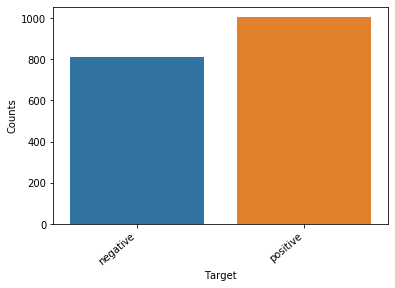

In [27]:
plot_classes = final_comb.groupby(by=(['Target'])).count()[final_comb.keys()[0]]
ax = sns.barplot(x=plot_classes.keys(), y=plot_classes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.ylabel('Counts')
plt.show()

#### Distribution Cancer Type wise and Stage Wise


In [28]:
plot_distribution = final_comb.groupby(by = ['Tumor type', 'AJCC Stage']).count()[final_comb.keys()[0]]

In [29]:
print('Data distribution of different cancer types and stages collected:')
plot_distribution

Data distribution of different cancer types and stages collected:


Tumor type  AJCC Stage
Breast      I              32
            II            114
            III            63
Colorectum  I              77
            II            191
            III           120
Esophagus   I               5
            II             29
            III            11
Liver       I               5
            II             19
            III            20
Lung        I              46
            II             27
            III            31
Normal      normal        812
Ovary       I               9
            II              4
            III            41
Pancreas    I               4
            II             83
            III             6
Stomach     I              21
            II             30
            III            17
Name: Patient ID #, dtype: int64

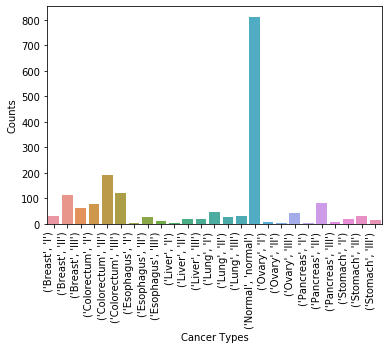

In [30]:
ax = sns.barplot(x=plot_distribution.keys(), y=plot_distribution)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",size = 10)
plt.ylabel('Counts')
plt.xlabel('Cancer Types')
plt.show()

## 8. Protein Biomarkers

**The final combination of dataset that was created had numerous amount of white spces in the column name for the downstream convinience we have renamed all of them**

In [31]:

column_dict = {'Patient ID #':'Patient_ID', 'Sample ID #':'Sample_ID', 'Tumor type':'Tumor_type', 
       'AJCC Stage':'AJCC_Stage', 'Plasma volume (mL)':'Plasma_volume(mL)',
       'Plasma DNA concentration (ng/mL)':'Plasma_DNA_concentration(ng/mL)', 
       'Mutation identified in plasma*':'Mutation_identified_in_plasma',
       'ÃÂ© score':'omega_score', 'Mutant allele frequency (%)':'Mutant_allele_frequency(%)',
       'Mutant fragments/mL plasma':'Mutant_fragments/mL_plasma', 'AFP (pg/ml)':'AFP(pg/ml)', 
       'Angiopoietin-2 (pg/ml)':'Angiopoietin-2(pg/ml)','AXL (pg/ml)':'AXL(pg/ml)', 'CA-125 (U/ml)':'CA-125(U/ml)', 
       'CA 15-3 (U/ml)':'CA-15-3(U/ml)', 'CA19-9 (U/ml)':'CA19-9(U/ml)','CD44 (ng/ml)':'CD44(ng/ml)', 
       'CEA (pg/ml)':'CEA(pg/ml)', 'CYFRA 21-1 (pg/ml)':'CYFRA-21-1(pg/ml)', 'DKK1 (ng/ml)':'DKK1(ng/ml)',
       'Endoglin (pg/ml)':'Endoglin(pg/ml)', 'FGF2 (pg/ml)':'FGF2(pg/ml)', 'Follistatin (pg/ml)':'Follistatin(pg/ml)',
       'Galectin-3 (ng/ml)':'Galectin-3(ng/ml)', 'G-CSF (pg/ml)':'G-CSF(pg/ml)', 'GDF15 (ng/ml)':'GDF15(ng/ml)', 
       'HE4 (pg/ml)':'HE4(pg/ml)', 'HGF (pg/ml)':'HGF(pg/ml)', 'IL-6 (pg/ml)':'IL-6(pg/ml)', 
       'IL-8 (pg/ml)':'IL-8(pg/ml)', 'Kallikrein-6 (pg/ml)':'Kallikrein-6(pg/ml)','Leptin (pg/ml)':'Leptin(pg/ml)', 
       'Mesothelin (ng/ml)':'Mesothelin(ng/ml)', 'Midkine (pg/ml)':'Midkine(pg/ml)','Myeloperoxidase (ng/ml)':'Myeloperoxidase(ng/ml)', 
       'NSE (ng/ml)':'NSE(ng/ml)', 'OPG (ng/ml)':'OPG(ng/ml)', 'OPN (pg/ml)':'OPN(pg/ml)','PAR (pg/ml)':'PAR(pg/ml)', 
       'Prolactin (pg/ml)':'Prolactin(pg/ml)', 'sEGFR (pg/ml)':'sEGFR(pg/ml)', 'sFas (pg/ml)':'sFas(pg/ml)',
       'SHBG (nM)':'SHBG(nM)', 'sHER2/sEGFR2/sErbB2 (pg/ml)':'sHER2/sEGFR2/sErbB2(pg/ml)', 
       'sPECAM-1 (pg/ml)':'sPECAM-1(pg/ml)', 'TGFa (pg/ml)':'TGFa(pg/ml)', 'Thrombospondin-2 (pg/ml)':'Thrombospondin-2(pg/ml)', 
       'TIMP-1 (pg/ml)':'TIMP-1(pg/ml)','TIMP-2 (pg/ml)':'TIMP-2(pg/ml)'}
data = final_comb.rename(columns=column_dict)
data.head()

,Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,Age,Sex,Race,Histopathology,Plasma_volume(mL),Plasma_DNA_concentration(ng/mL),...,sEGFR(pg/ml),sFas(pg/ml),SHBG(nM),sHER2/sEGFR2/sErbB2(pg/ml),sPECAM-1(pg/ml),TGFa(pg/ml),Thrombospondin-2(pg/ml),TIMP-1(pg/ml),TIMP-2(pg/ml),Target
0,CRC 455,CRC 455 PLS 1,Colorectum,I,60,Male,Caucasian,Adenocarcinoma,5.0,6.08,...,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,positive
1,CRC 456,CRC 456 PLS 1,Colorectum,I,59,Female,Caucasian,Adenocarcinoma,4.0,46.01,...,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,positive
2,CRC 457,CRC 457 PLS 1,Colorectum,II,69,Female,Caucasian,Adenocarcinoma,4.5,6.94,...,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,positive
3,CRC 458,CRC 458 PLS 1,Colorectum,II,70,Female,Caucasian,Adenocarcinoma,7.5,7.15,...,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,positive
4,CRC 459,CRC 459 PLS 1,Colorectum,II,43,Female,Caucasian,Adenocarcinoma,5.0,9.81,...,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,positive


**Creating histograms for each cancer type with its differnet stages compared with different protein biomarkers, visualizing the top 3 protien biomarkers as shown below**

In [32]:
def make_hist(df,protein_type):
    cancer_types=df['Tumor_type'].unique()
    cancer_stage=df['AJCC_Stage'].unique()
    fig, axs = plt.subplots(len(cancer_types)-1, len(cancer_stage)-1,figsize=(15,15),sharex=True,sharey=True) #this forces to share x and y
    plt.xlabel(protein_type, fontsize = 20)
    plt.ylabel("counts")
    for i ,c_type in enumerate(cancer_types):
        for j,aj_stage in enumerate(cancer_stage):
            if c_type != 'Normal' and aj_stage != 'normal' :
                axs[i, j].hist(df[(df['Tumor_type'] == c_type) &( df['AJCC_Stage']==aj_stage )][protein_type])
                axs[i, j].set_title(c_type+" "+aj_stage)
    fig.tight_layout(pad=3.0)
    plt.show()
    return None

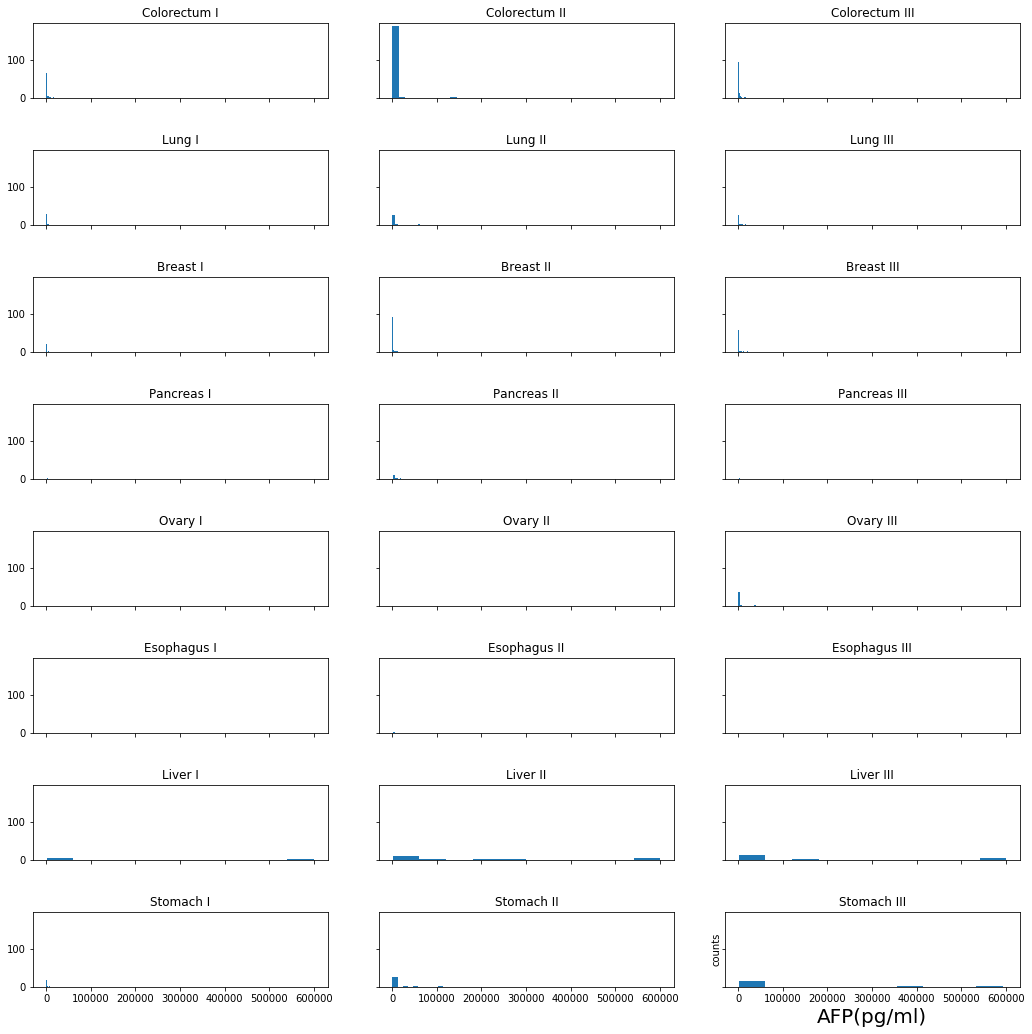

In [33]:
make_hist(data,'AFP(pg/ml)')

**From the above graph plotting the visual data is very minimal as the scale is very large and the bins are very far apart, to fix this we are taking a log of both x and y axis for better visualization**

In [34]:
def make_hist(df,protein_type):
    cancer_types=df['Tumor_type'].unique()
    cancer_stage=df['AJCC_Stage'].unique()
    fig, axs = plt.subplots(len(cancer_types)-1, len(cancer_stage)-1,figsize=(15,15),sharex=True,sharey=True) #this forces to share x and y
    plt.xlabel(protein_type, fontsize = 20)
    plt.ylabel("counts")
    for i ,c_type in enumerate(cancer_types):
        for j,aj_stage in enumerate(cancer_stage):
            if c_type != 'Normal' and aj_stage != 'normal' :
                axs[i, j].hist(np.log10(df[(df['Tumor_type'] == c_type) &( df['AJCC_Stage']==aj_stage )][protein_type]),log=10)
                axs[i, j].set_title(c_type+" "+aj_stage)
    fig.tight_layout(pad=3.0)
    plt.show()
    return None

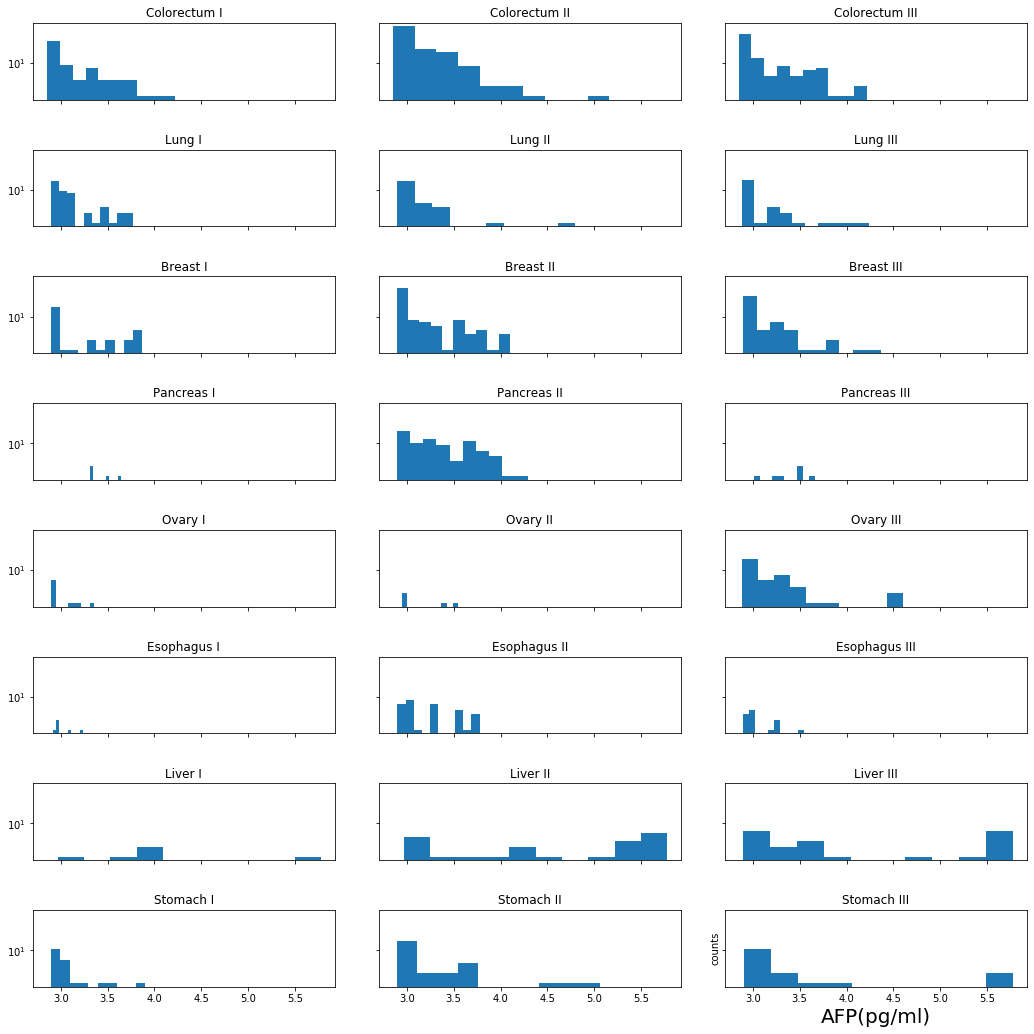

In [35]:
make_hist(data,'AFP(pg/ml)')

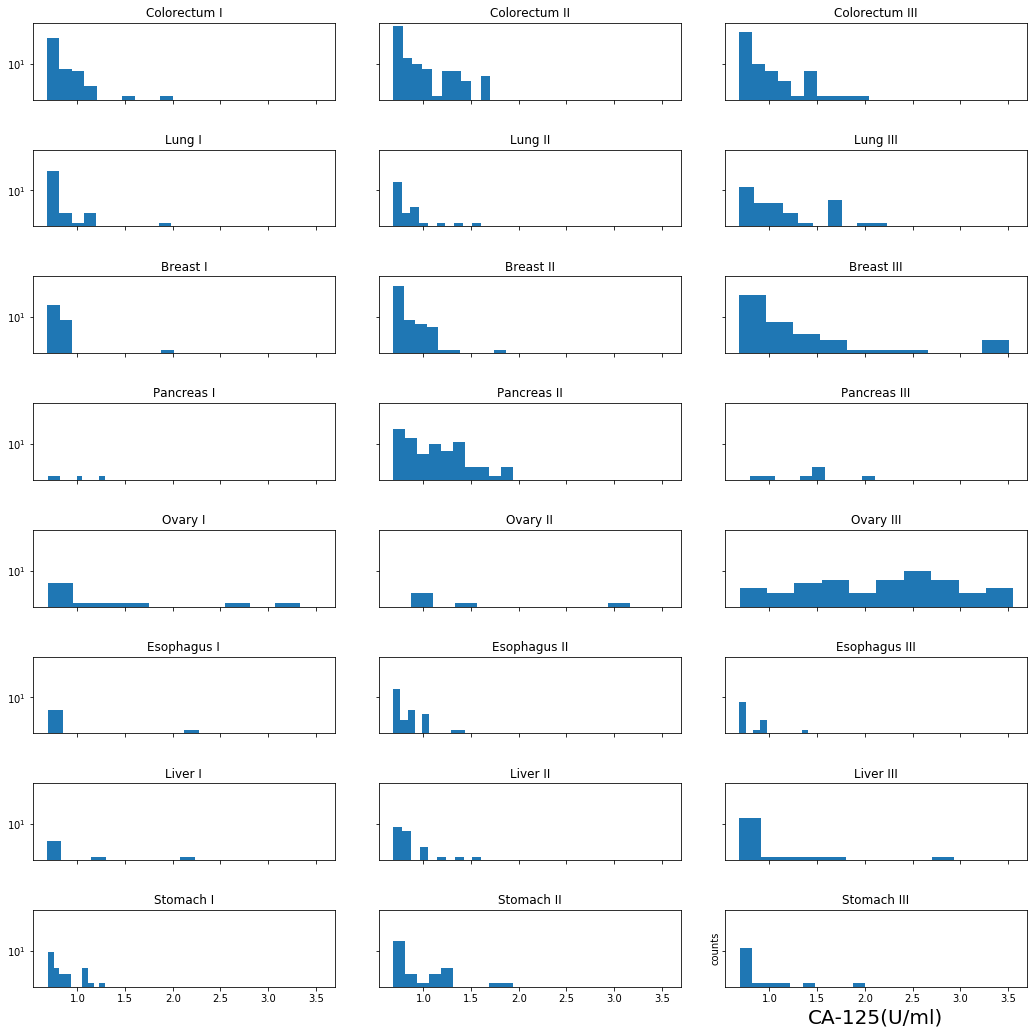

In [36]:
make_hist(data,'CA-125(U/ml)')

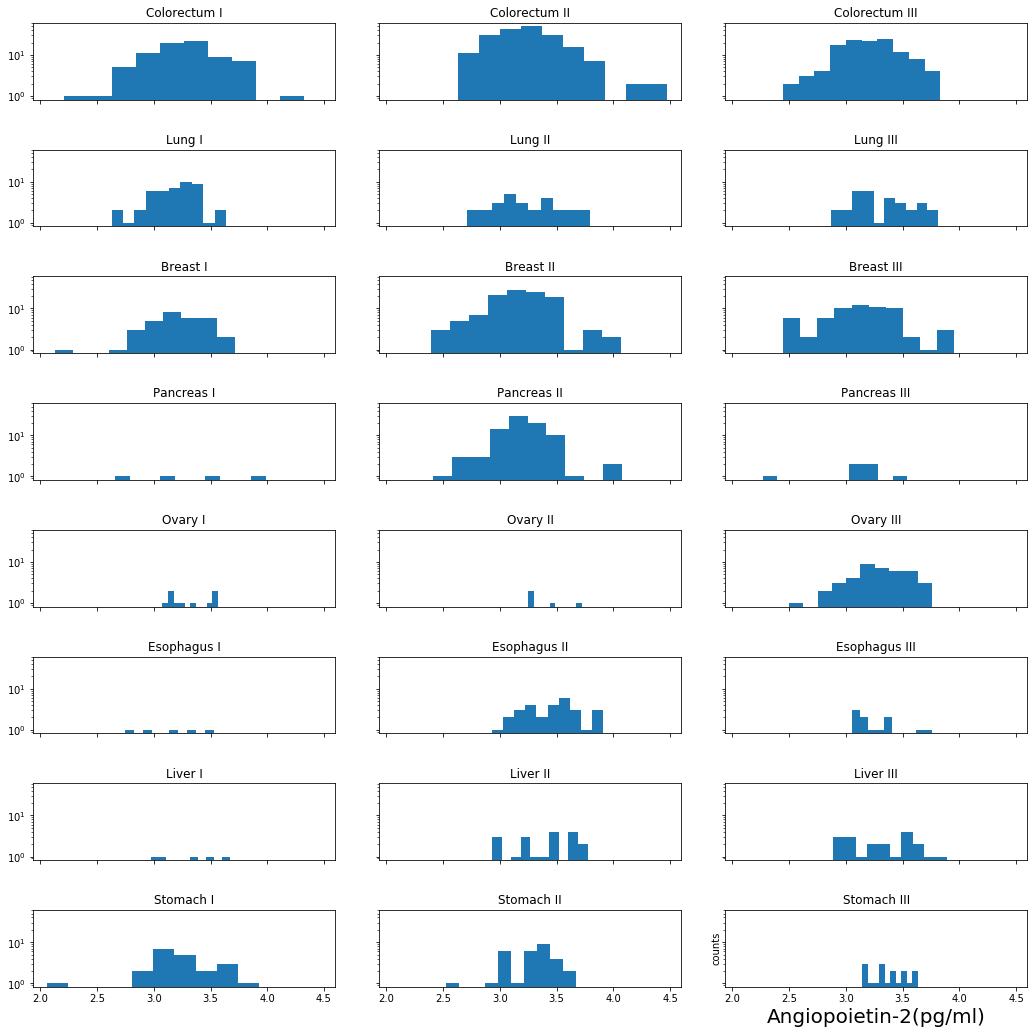

In [37]:
make_hist(data,'Angiopoietin-2(pg/ml)')

**Creating box plot to visualize the outliners in the data**

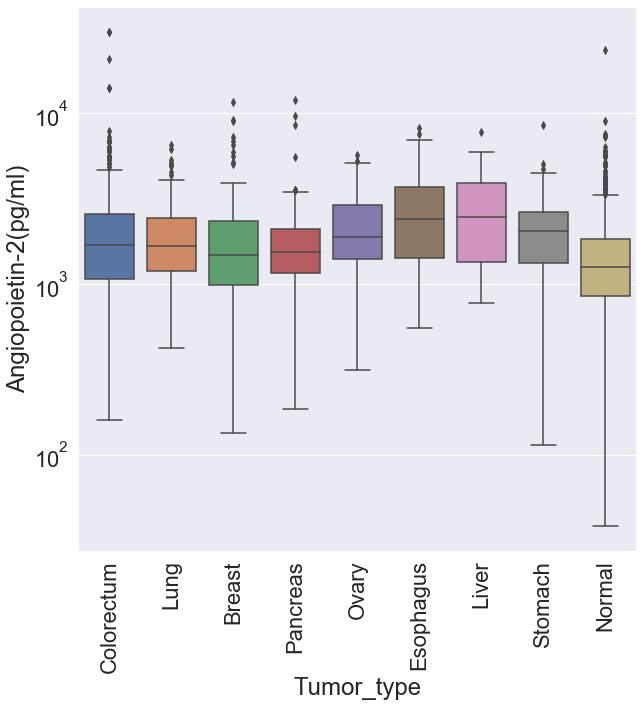

In [38]:
protein_types = list(data.columns[15:-1])
for ij,i in enumerate(protein_types):
    plt.figure(figsize=(10, 10))
    sns.set(font_scale = 2)
    sns.boxplot( x='Tumor_type', y=i ,data=data).set(yscale="log")
    plt.xticks(rotation=90)
    plt.show()
    break

**the above visualization of box plot is based on genral types of cancer**

**creating visualization for box plot with break down for each cancer types**

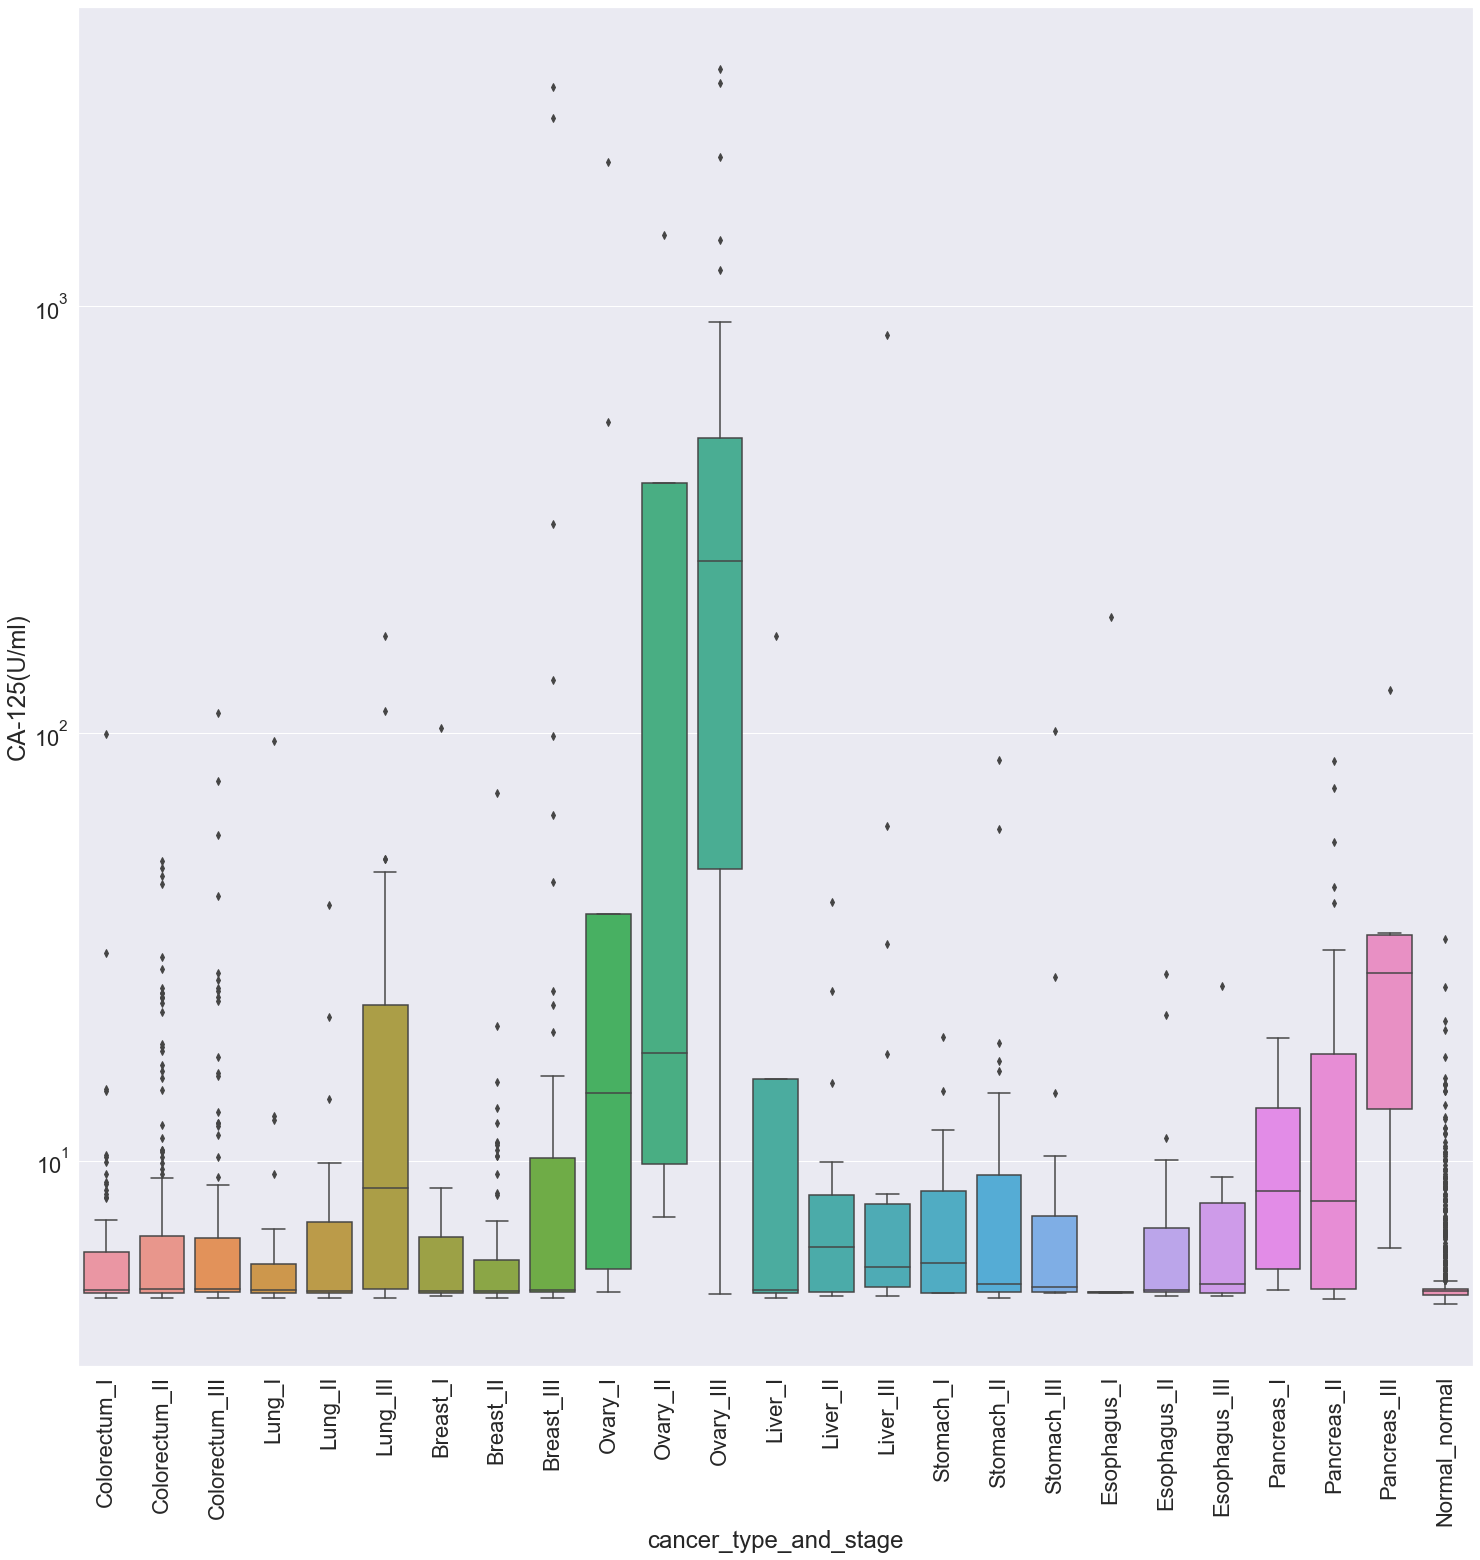

In [39]:
new_list=list(data.columns) #making a list of all columns
new_list=new_list[1:len(new_list)] # removing unwanted first coloumn
'''creating a pandas frame
where the column tumor type and ajcc and concatenated'''
new_df_temp=pd.DataFrame()
j=0
for i in new_list:
    if i !='Tumor_type':
        if i != 'AJCC_Stage':
            new_df_temp.insert(j, i, data[i], True) 
            j+=1
new_temp_list=[]
for i, j in zip(data['Tumor_type'],data['AJCC_Stage']):
    new_temp_list.append(i+"_"+j)
    
new_df_temp.insert(2,'cancer_type_and_stage',new_temp_list,True)

protein_types = list(new_df_temp.columns[15:-1])
for ij,i in enumerate(protein_types):
    plt.figure(figsize=(25, 25))
    sns.set(font_scale = 2)
#     sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15}) 
    sns.boxplot( x='cancer_type_and_stage', y=i ,data=new_df_temp,order=['Colorectum_I', 'Colorectum_II', 'Colorectum_III', 
                                                                         'Lung_I','Lung_II', 'Lung_III', 
                                                                         'Breast_I', 'Breast_II', 'Breast_III',
                                                                         'Ovary_I','Ovary_II','Ovary_III',
                                                                         'Liver_I', 'Liver_II','Liver_III', 
                                                                         'Stomach_I','Stomach_II',  'Stomach_III', 
                                                                         'Esophagus_I','Esophagus_II','Esophagus_III', 
                                                                         'Pancreas_I','Pancreas_II','Pancreas_III',
                                                                         'Normal_normal']).set(yscale="log")
    plt.xticks(rotation=90)
    plt.show()
    break


**Making a new table to show the min and max of each protein bio markers with different types of cancer**

In [40]:
cancer_types=data['Tumor_type'].unique()
cancer_stage=data['AJCC_Stage'].unique()
new_dict={}
for protein_type in list(data.columns[15:-1]):
    temp_dict={}
    for i ,c_type in enumerate(cancer_types):
            for j,aj_stage in enumerate(cancer_stage):
                if c_type != 'Normal' and aj_stage != 'normal' :
                    temp_dict[c_type,aj_stage]={'min':data[(data['Tumor_type'] == c_type) &( data['AJCC_Stage']==aj_stage )][protein_type].min(),
                                                'max':data[(data['Tumor_type'] == c_type) &( data['AJCC_Stage']==aj_stage )][protein_type].max(),
                                                'median':data[(data['Tumor_type'] == c_type) &( data['AJCC_Stage']==aj_stage )][protein_type].median(),
                                                'mean':data[(data['Tumor_type'] == c_type) &( data['AJCC_Stage']==aj_stage )][protein_type].mean(),
                                               'log_min':np.log10(data[(data['Tumor_type'] == c_type) &( data['AJCC_Stage']==aj_stage )][protein_type].min()),
                                                'log_max':np.log10(data[(data['Tumor_type'] == c_type) &( data['AJCC_Stage']==aj_stage )][protein_type].max()),
                                                'log_median':np.log10(data[(data['Tumor_type'] == c_type) &( data['AJCC_Stage']==aj_stage )][protein_type].median()),
                                                'log_mean':np.log10(data[(data['Tumor_type'] == c_type) &( data['AJCC_Stage']==aj_stage )][protein_type].mean())
                                               }
                if c_type == 'Normal' and aj_stage == 'normal' :
                    temp_dict[c_type,aj_stage]={'min':data[(data['Tumor_type'] == c_type) &( data['AJCC_Stage']==aj_stage )][protein_type].min(),
                                                'max':data[(data['Tumor_type'] == c_type) &( data['AJCC_Stage']==aj_stage )][protein_type].max(),
                                                'median':data[(data['Tumor_type'] == c_type) &( data['AJCC_Stage']==aj_stage )][protein_type].median(),
                                                'mean':data[(data['Tumor_type'] == c_type) &( data['AJCC_Stage']==aj_stage )][protein_type].mean(),
                                               'log_min':np.log10(data[(data['Tumor_type'] == c_type) &( data['AJCC_Stage']==aj_stage )][protein_type].min()),
                                                'log_max':np.log10(data[(data['Tumor_type'] == c_type) &( data['AJCC_Stage']==aj_stage )][protein_type].max()),
                                                'log_median':np.log10(data[(data['Tumor_type'] == c_type) &( data['AJCC_Stage']==aj_stage )][protein_type].median()),
                                                'log_mean':np.log10(data[(data['Tumor_type'] == c_type) &( data['AJCC_Stage']==aj_stage )][protein_type].mean())
                                               }
    new_dict[protein_type]=temp_dict

    
new_list=[]
for i in new_dict:
    for j in new_dict[i]:
        new_list.append([i,j[0],j[1],new_dict[i][j]['min'],new_dict[i][j]['max'],new_dict[i][j]['median'],new_dict[i][j]['mean'],new_dict[i][j]['log_min'],new_dict[i][j]['log_max'],new_dict[i][j]['log_median'],new_dict[i][j]['log_mean']])
min_max_df=pd.DataFrame(new_list,columns=['Protein type','cancer_type','acjj_stage','Min','Max','Median','Mean','log_min','log_max','log_mean','log_median'])
min_max_df.head()

,Protein type,cancer_type,acjj_stage,Min,Max,Median,Mean,log_min,log_max,log_mean,log_median
0,Angiopoietin-2(pg/ml),Colorectum,I,159.97,20936.350,1831.740,2505.731429,2.204039,4.320901,3.262864,3.398935
1,Angiopoietin-2(pg/ml),Colorectum,II,430.20,30001.791,1709.620,2444.454874,2.633670,4.477147,3.232900,3.388182
2,Angiopoietin-2(pg/ml),Colorectum,III,278.81,6809.770,1524.330,1887.952917,2.445308,3.833132,3.183079,3.275991
3,Angiopoietin-2(pg/ml),Lung,I,424.08,4357.560,1642.755,1737.695217,2.627448,3.639243,3.215573,3.239974
4,Angiopoietin-2(pg/ml),Lung,II,513.82,6193.410,1596.530,2089.354444,2.710811,3.791930,3.203177,3.320012


In [41]:
min_max_df.to_csv('min_max_median_mean_logs_with_normal.csv')

## Mutations

In [42]:
data.Mutation_identified_in_plasma.value_counts()

TP53 p.K372fs, c.1114delA    82
None detected                66
TP53 p.R202C, c.604C>T       63
TP53 p.R273H, c.818G>A       56
TP53 p.A138T, c.412G>A       31
                             ..
TP53 p.V157A, c.470T>C        1
EGFR p.L858R, c.2573T>G       1
PIK3CA p.E545Q, c.1633G>C     1
APC p.N1455fs, c.4364delA     1
TP53 p.C135F, c.404G>T        1
Name: Mutation_identified_in_plasma, Length: 604, dtype: int64

In [43]:
data.Mutation_identified_in_plasma.nunique()

604

Removing " None detected " because we need to identify mutations in cancer patients and not in healthy individuals.

In [44]:
Mutation = data[data.Mutation_identified_in_plasma != 'None detected']
Mutation.Mutation_identified_in_plasma.value_counts()

TP53 p.K372fs, c.1114delA    82
TP53 p.R202C, c.604C>T       63
TP53 p.R273H, c.818G>A       56
TP53 p.A138T, c.412G>A       31
TP53 p.L369P, c.1106T>C      26
                             ..
TP53 p.V157A, c.470T>C        1
EGFR p.L858R, c.2573T>G       1
PIK3CA p.E545Q, c.1633G>C     1
APC p.N1455fs, c.4364delA     1
TP53 p.C135F, c.404G>T        1
Name: Mutation_identified_in_plasma, Length: 603, dtype: int64

In [45]:
Mutation[Mutation.Mutation_identified_in_plasma=="None detected"]

,Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,Age,Sex,Race,Histopathology,Plasma_volume(mL),Plasma_DNA_concentration(ng/mL),...,sEGFR(pg/ml),sFas(pg/ml),SHBG(nM),sHER2/sEGFR2/sErbB2(pg/ml),sPECAM-1(pg/ml),TGFa(pg/ml),Thrombospondin-2(pg/ml),TIMP-1(pg/ml),TIMP-2(pg/ml),Target


In [46]:
Mutation.shape  

(1751, 54)

Originally there were 1817 rows . After removing none detected 1751 rows are left.

In [47]:
Mutation.head()

,Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,Age,Sex,Race,Histopathology,Plasma_volume(mL),Plasma_DNA_concentration(ng/mL),...,sEGFR(pg/ml),sFas(pg/ml),SHBG(nM),sHER2/sEGFR2/sErbB2(pg/ml),sPECAM-1(pg/ml),TGFa(pg/ml),Thrombospondin-2(pg/ml),TIMP-1(pg/ml),TIMP-2(pg/ml),Target
0,CRC 455,CRC 455 PLS 1,Colorectum,I,60,Male,Caucasian,Adenocarcinoma,5.0,6.08,...,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,positive
1,CRC 456,CRC 456 PLS 1,Colorectum,I,59,Female,Caucasian,Adenocarcinoma,4.0,46.01,...,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,positive
2,CRC 457,CRC 457 PLS 1,Colorectum,II,69,Female,Caucasian,Adenocarcinoma,4.5,6.94,...,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,positive
3,CRC 458,CRC 458 PLS 1,Colorectum,II,70,Female,Caucasian,Adenocarcinoma,7.5,7.15,...,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,positive
4,CRC 459,CRC 459 PLS 1,Colorectum,II,43,Female,Caucasian,Adenocarcinoma,5.0,9.81,...,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,positive


### Mutation not sole indication of cancer presence.
An example mutation showing one mutation is not related to just one particular cancer type it can be found in multiple cancer sites.
Though the frequency of particular mutation is usually high particular cancer type but not neccesarily limits itself to one cancer type. Presence of Mutations doesn't necessarily indicates the occurence of cancer but its basically an indication. Other factors needs to combined to observe the presence of cancer like protien biomarkers.

In [48]:
Mutation[Mutation.Mutation_identified_in_plasma=="TP53 p.R273H, c.818G>A"]

,Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,Age,Sex,Race,Histopathology,Plasma_volume(mL),Plasma_DNA_concentration(ng/mL),...,sEGFR(pg/ml),sFas(pg/ml),SHBG(nM),sHER2/sEGFR2/sErbB2(pg/ml),sPECAM-1(pg/ml),TGFa(pg/ml),Thrombospondin-2(pg/ml),TIMP-1(pg/ml),TIMP-2(pg/ml),Target
8,CRC 463,CRC 463 PLS 1,Colorectum,I,47,Female,Caucasian,Adenocarcinoma,7.5,5.47,...,1683.93,204.792,144.11,4232.62,4609.75,16.086,2033.030,18330.00,29151.57,positive
17,CRC 472,CRC 472 PLS 1,Colorectum,II,66,Male,Caucasian,Adenocarcinoma,5.0,16.78,...,2137.26,204.792,71.03,4305.85,6838.52,16.086,4028.310,18682.82,24805.66,positive
51,CRC 507,CRC 507 PLS 1,Colorectum,I,59,Male,Caucasian,Adenocarcinoma,7.5,3.79,...,1997.64,2005.110,22.39,4130.76,3791.30,16.200,3558.800,57625.12,32837.86,positive
277,INDI 230,INDI 230 PLS 1,Colorectum,I,74,Male,Caucasian,Adenocarcinoma,7.5,5.16,...,2649.39,202.158,30.27,5954.89,4818.05,16.104,2229.275,47894.68,43493.96,positive
317,INDI 278,INDI 278 PLS 1,Ovary,III,57,Female,Caucasian,Epithelial carcinoma,7.5,10.27,...,1175.62,200.226,308.32,8344.21,7150.49,16.750,851.950,102415.79,64660.82,positive
463,INDI 440,INDI 440 PLS 1,Esophagus,II,48,Male,Asian,Adenocarcinoma,7.5,6.90,...,1981.32,435.540,37.72,4950.14,5921.19,16.494,3440.480,160777.27,40866.10,positive
504,INDI 484,INDI 484 PLS 1,Colorectum,II,86,Male,Caucasian,Adenocarcinoma,7.5,5.56,...,5971.73,206.094,143.68,11321.56,10294.76,16.356,20956.160,69689.26,48925.39,positive
524,INDI 507,INDI 507 PLS 1,Lung,II,57,Male,Caucasian,Non-small cell lung cancer,7.5,2.75,...,2366.27,2187.700,41.59,5607.60,6606.22,16.542,5981.150,37222.45,37536.47,positive
528,INDI 513,INDI 513 PLS 1,Lung,I,55,Female,Caucasian,Non-small cell lung cancer,7.5,7.83,...,2443.42,2285.890,62.58,6996.08,5684.55,16.542,14191.740,19780.28,27566.88,positive
534,INDI 519,INDI 519 PLS 1,Lung,I,80,Male,Caucasian,Non-small cell lung cancer,7.5,8.63,...,1400.55,1368.790,14.47,5024.48,6360.11,16.542,1774.615,39040.19,33436.10,positive


when we checked for particular mutation, it showed different cancer sites also and is not limited to just one cancer site which states that for localization of cancer in particular organ we might have to look for other features also and not just Mutation_identified_in_plasma. Though, it seems to be an important feature and to some extent frequency of certain mutations is high in one organ site which could be an important insight to look for. 

### RACE

In [49]:
gk=data.groupby('Race')
gk.first()

,Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,Age,Sex,Histopathology,Plasma_volume(mL),Plasma_DNA_concentration(ng/mL),Mutation_identified_in_plasma,...,sEGFR(pg/ml),sFas(pg/ml),SHBG(nM),sHER2/sEGFR2/sErbB2(pg/ml),sPECAM-1(pg/ml),TGFa(pg/ml),Thrombospondin-2(pg/ml),TIMP-1(pg/ml),TIMP-2(pg/ml),Target
Race,,,,,,,,,,,,,,,,,,,,,
Asian,INDI 055,INDI 055 PLS 1,Breast,II,69,Female,Invasive carcinoma (NOS),7.5,4.40,"TP53 p.T125T, c.375G>A (Exon End)",...,828.23,202.158,63.56,4651.19,2665.98,16.104,2229.275,41459.11,35864.25,positive
Black,CRC 484,CRC 484 PLS 1,Colorectum,I,73,Male,Adenocarcinoma,7.5,8.04,"TP53 p.R335H, c.1004G>A",...,2261.61,204.792,71.54,5353.01,5376.72,16.086,2033.030,20016.52,25704.04,positive
Black/Hispanic,NL,NL PLSA 1328,Normal,normal,21,Male,NaN,7.5,2.14,"TP53 p.K372fs, c.1114delA",...,2243.26,2298.900,170.22,6330.26,5308.45,16.428,1894.000,33908.25,26199.36,negative
Caucasian,CRC 455,CRC 455 PLS 1,Colorectum,I,60,Male,Adenocarcinoma,5.0,6.08,"TP53 p.K120E, c.358A>G",...,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.740,56428.71,39498.82,positive
Caucasian/Hispanic,NL,NL PLSA 1331,Normal,normal,18,Female,NaN,7.5,1.04,"TP53 p.A138T, c.412G>A",...,1060.49,2042.030,100.05,5152.88,3455.21,16.428,1894.000,36955.44,28910.22,negative
Hispanic,NL,NL PLS 918,Normal,normal,24,Male,Epithelial carcinoma,7.5,3.67,TP53 g.7577018C>T (Splice Site),...,5341.22,200.226,20.08,11165.96,7934.40,16.416,3235.020,57082.94,47393.44,negative
Other,NL,NL PLSA 1540,Normal,normal,68,Female,Adenocarcinoma,7.5,2.95,"TP53 p.R213*, c.637C>T",...,1476.19,2505.350,59.61,4871.82,7299.08,16.800,2245.650,43948.29,38352.69,negative
Unknown,INDI 024,INDI 024 PLS 1,Lung,II,71,Female,Non-small cell lung cancer,7.5,3.11,"TP53 p.L369P, c.1106T>C",...,1753.22,202.158,57.33,7854.70,4476.64,16.104,3155.420,80793.43,43357.07,positive


### Race Vs Cancer frequency

In [50]:
Tumor_type_excluding_normal=data[data.Tumor_type != 'Normal']
Tumor_type_excluding_normal.head()

,Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,Age,Sex,Race,Histopathology,Plasma_volume(mL),Plasma_DNA_concentration(ng/mL),...,sEGFR(pg/ml),sFas(pg/ml),SHBG(nM),sHER2/sEGFR2/sErbB2(pg/ml),sPECAM-1(pg/ml),TGFa(pg/ml),Thrombospondin-2(pg/ml),TIMP-1(pg/ml),TIMP-2(pg/ml),Target
0,CRC 455,CRC 455 PLS 1,Colorectum,I,60,Male,Caucasian,Adenocarcinoma,5.0,6.08,...,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,positive
1,CRC 456,CRC 456 PLS 1,Colorectum,I,59,Female,Caucasian,Adenocarcinoma,4.0,46.01,...,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,positive
2,CRC 457,CRC 457 PLS 1,Colorectum,II,69,Female,Caucasian,Adenocarcinoma,4.5,6.94,...,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,positive
3,CRC 458,CRC 458 PLS 1,Colorectum,II,70,Female,Caucasian,Adenocarcinoma,7.5,7.15,...,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,positive
4,CRC 459,CRC 459 PLS 1,Colorectum,II,43,Female,Caucasian,Adenocarcinoma,5.0,9.81,...,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,positive


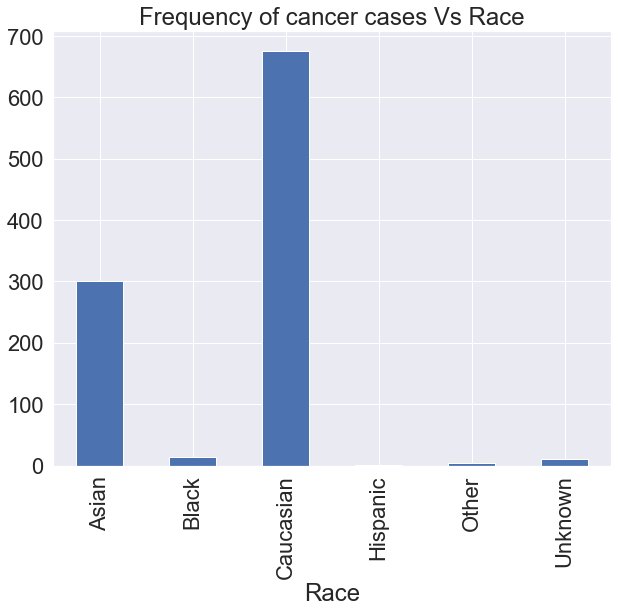

In [51]:
Tumor_type_excluding_normal.groupby('Race')['Tumor_type'].count().plot(kind='bar',figsize=(10,8),title='Frequency of cancer cases Vs Race' );

Cancer cases are mostly found in Caucasian race and then in Asians.

In [52]:
Tumor_type_excluding_normal.groupby('Race')['Tumor_type'].count()

Race
Asian        301
Black         14
Caucasian    675
Hispanic       1
Other          4
Unknown       10
Name: Tumor_type, dtype: int64

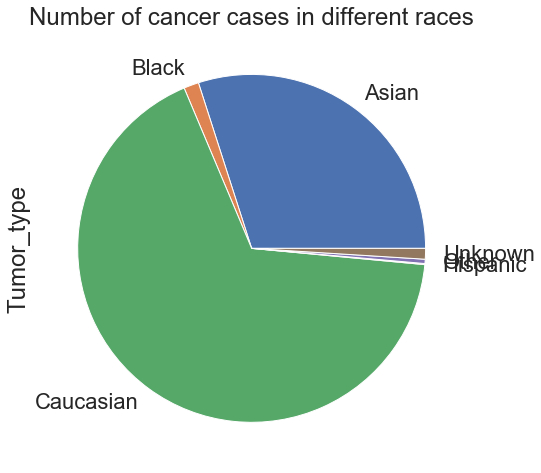

In [53]:
from matplotlib.pyplot import pie, axis, show
Tumor_type_excluding_normal.groupby('Race')['Tumor_type'].count().plot(kind='pie',figsize=(10,8),title='Number of cancer cases in different races' );

In [54]:
Tumor_type_excluding_normal.groupby('Race')['Tumor_type'].value_counts(sort=True)

Race       Tumor_type
Asian      Colorectum    124
           Breast         69
           Stomach        41
           Esophagus      32
           Liver          26
           Lung            5
           Ovary           2
           Pancreas        2
Black      Ovary           6
           Colorectum      5
           Pancreas        2
           Esophagus       1
Caucasian  Colorectum    257
           Breast        139
           Lung           96
           Pancreas       86
           Ovary          42
           Stomach        26
           Liver          17
           Esophagus      12
Hispanic   Ovary           1
Other      Ovary           3
           Pancreas        1
Unknown    Lung            3
           Colorectum      2
           Pancreas        2
           Breast          1
           Liver           1
           Stomach         1
Name: Tumor_type, dtype: int64

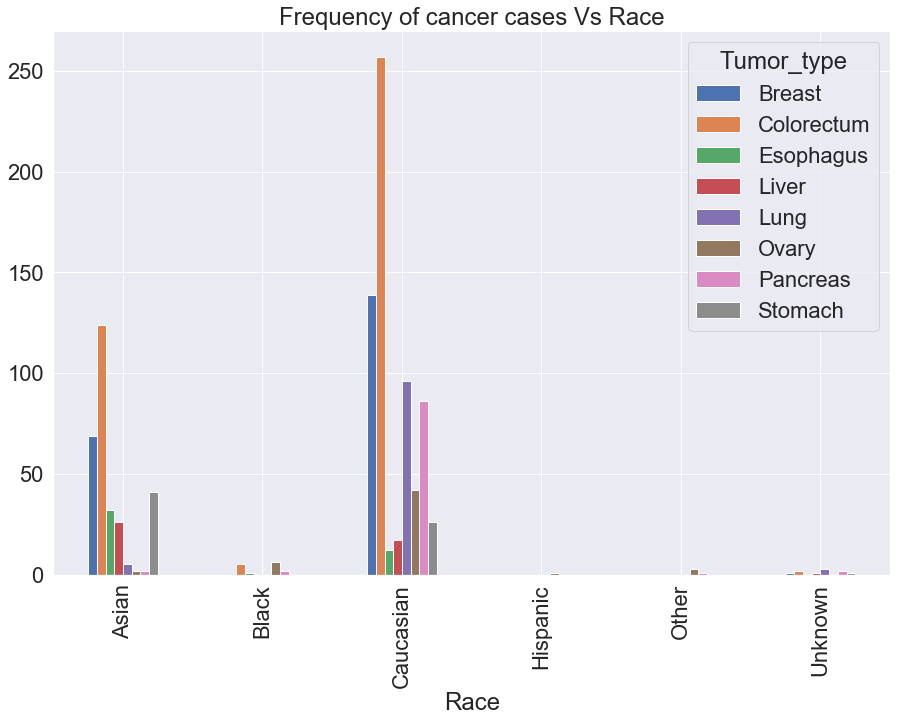

In [55]:
#Tumor_type_excluding_normal.groupby('Race')['Tumor_type'].value_counts().plot(kind='barh',figsize=(10,8),title='Frequency of cancer cases Vs Race' );
Tumor_type_excluding_normal.groupby('Race')['Tumor_type'].value_counts().unstack(1).plot.bar(figsize=(15, 10),title='Frequency of cancer cases Vs Race')

### Sex Vs Cancer frequency

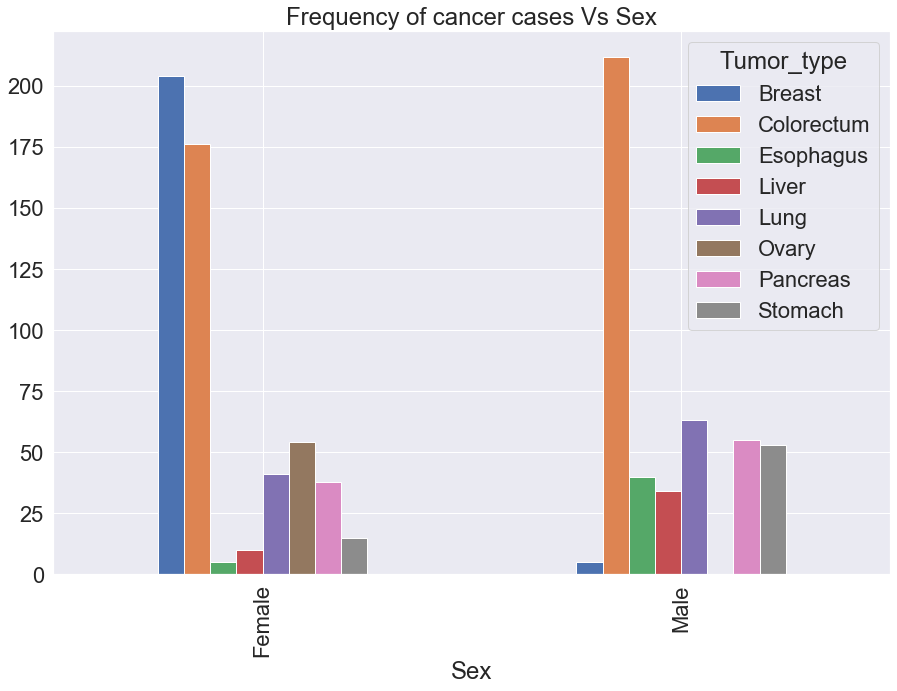

In [56]:
Tumor_type_excluding_normal.groupby('Sex')['Tumor_type'].value_counts().unstack(1).plot.bar(figsize=(15, 10),title='Frequency of cancer cases Vs Sex')

## this below code is for identifying the mutation in plasma, break is applied to save memory, remove the break to visualize all graphs

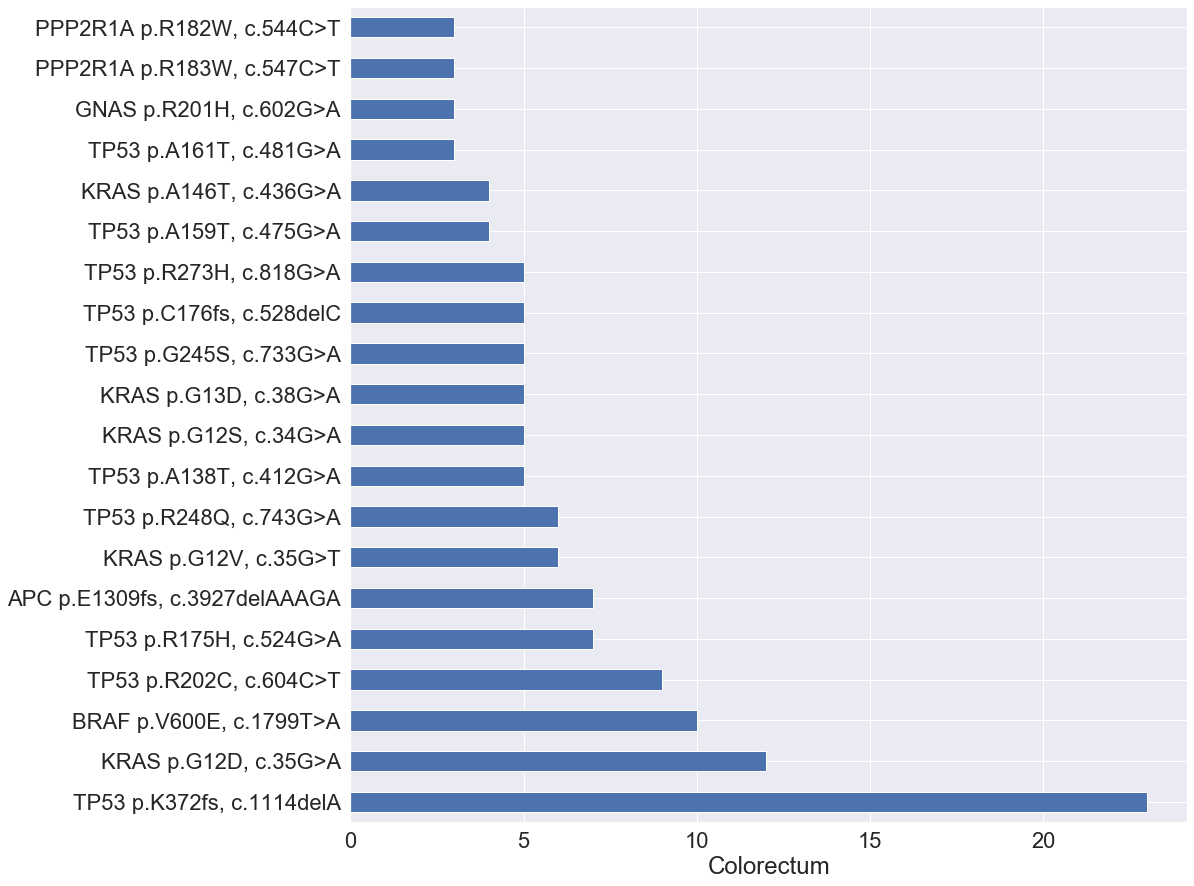

In [57]:
for i in Mutation.Tumor_type.unique():
    Mutation[Mutation.Tumor_type==i].Mutation_identified_in_plasma.value_counts()[:20].plot(kind='barh',figsize=(15,15))
    plt.xlabel(i)
    plt.show()
    break


### Feature Engineering

In [58]:
data.sample(3).T

,1377,540,1138
Patient_ID,NL,INDI 526,NL
Sample_ID,NL PLSA 1514,INDI 526 PLS 1,NL PLSA 1199
Tumor_type,Normal,Esophagus,Normal
AJCC_Stage,normal,III,normal
Age,56,79,28
Sex,Male,Male,Female
Race,Caucasian,Caucasian,Hispanic
Histopathology,NaN,Adenocarcinoma,NaN
Plasma_volume(mL),7.5,7.5,7.5
Plasma_DNA_concentration(ng/mL),2.99,2.93,5.06


* By seeing the sample data for 3 columns, we can see that the dataset contains Numerical features and categorical features. We handled missing values during data collection whcih is part of our feature engineering.

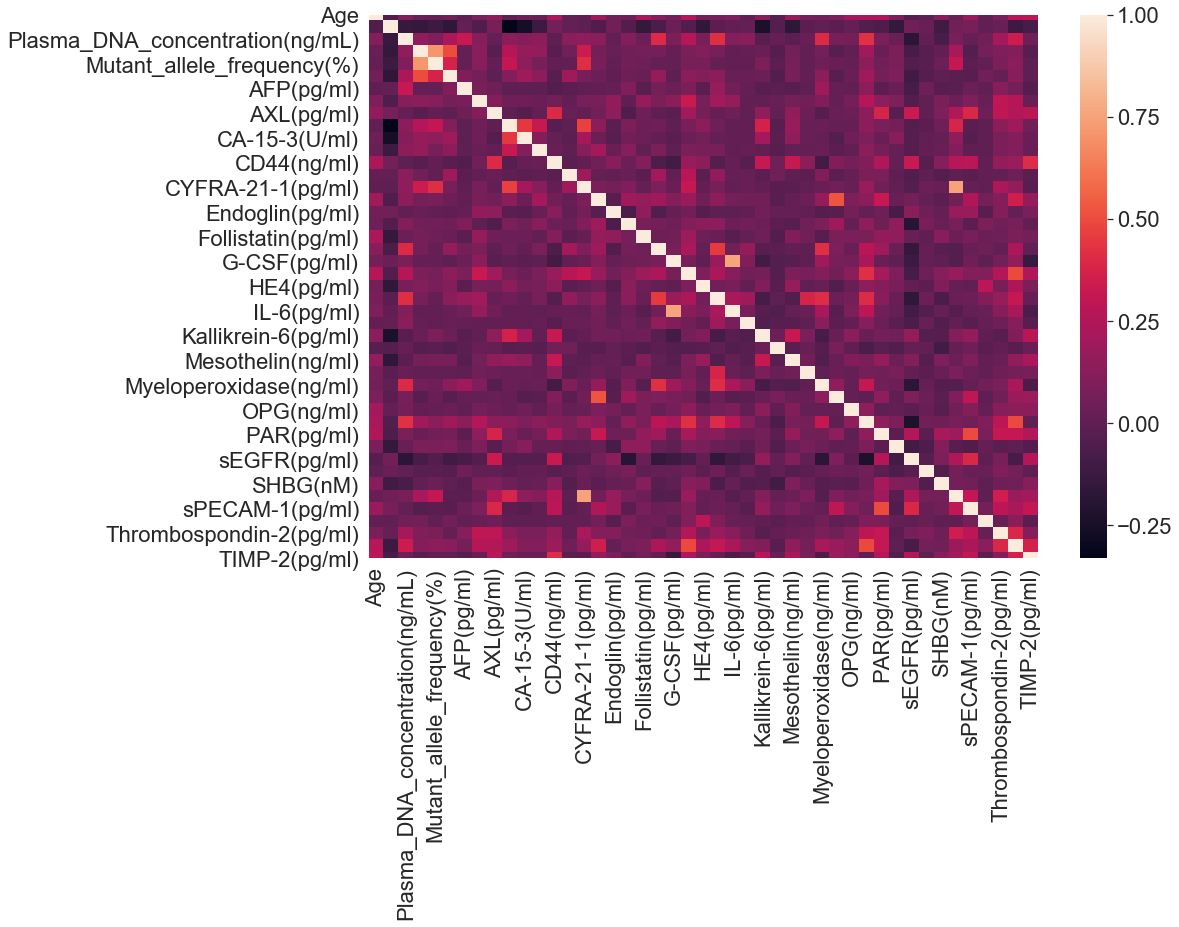

In [59]:
#Plot heatmap of feature correlation
plt.figure(figsize = (15,10))
corr = data.corr()
sns.heatmap(corr)

In [60]:
corr

,Age,Plasma_volume(mL),Plasma_DNA_concentration(ng/mL),Ω score,Mutant_allele_frequency(%),Mutant_fragments/mL_plasma,AFP(pg/ml),Angiopoietin-2(pg/ml),AXL(pg/ml),CA-125(U/ml),...,Prolactin(pg/ml),sEGFR(pg/ml),sFas(pg/ml),SHBG(nM),sHER2/sEGFR2/sErbB2(pg/ml),sPECAM-1(pg/ml),TGFa(pg/ml),Thrombospondin-2(pg/ml),TIMP-1(pg/ml),TIMP-2(pg/ml)
Age,1.000000,-0.052990,0.116235,0.027964,0.017524,0.051310,0.002033,0.090893,0.155036,0.007224,...,0.085344,-0.025048,-0.003071,0.123880,0.027975,0.182693,0.006320,0.083528,0.270157,0.284542
Plasma_volume(mL),-0.052990,1.000000,-0.134436,-0.145942,-0.119619,-0.161034,0.014094,-0.051702,0.072880,-0.330400,...,-0.144057,0.055747,0.030044,-0.105626,0.049804,0.078185,0.006905,0.023394,-0.120631,-0.078627
Plasma_DNA_concentration(ng/mL),0.116235,-0.134436,1.000000,0.149389,0.096003,0.229247,0.321335,0.121386,0.019807,0.136910,...,0.028984,-0.176344,0.006774,-0.074991,0.074784,0.016686,0.056517,0.213163,0.336192,0.043807
Ω score,0.027964,-0.145942,0.149389,1.000000,0.712327,0.506259,0.018857,0.128770,-0.019421,0.266513,...,0.086297,-0.080603,-0.018679,0.012117,0.222376,-0.034447,0.062734,0.098635,0.112286,-0.021224
Mutant_allele_frequency(%),0.017524,-0.119619,0.096003,0.712327,1.000000,0.375586,0.012665,0.125667,0.008432,0.307673,...,0.086408,-0.042758,-0.022709,0.037626,0.317344,-0.008935,0.002515,0.087656,0.136380,-0.003889
Mutant_fragments/mL_plasma,0.051310,-0.161034,0.229247,0.506259,0.375586,1.000000,0.103638,0.060275,-0.007353,0.113673,...,0.092672,-0.099934,-0.029741,-0.007316,-0.015455,-0.028302,0.051367,0.020149,0.122515,-0.006016
AFP(pg/ml),0.002033,0.014094,0.321335,0.018857,0.012665,0.103638,1.000000,0.072114,0.039339,-0.006148,...,0.028249,-0.077159,0.040746,-0.023484,-0.014386,0.036719,0.006465,0.118335,0.067986,-0.031604
Angiopoietin-2(pg/ml),0.090893,-0.051702,0.121386,0.128770,0.125667,0.060275,0.072114,1.000000,0.113635,0.044572,...,0.093563,-0.042389,0.006160,0.087904,0.037843,0.095457,0.026337,0.295634,0.264285,0.025909
AXL(pg/ml),0.155036,0.072880,0.019807,-0.019421,0.008432,-0.007353,0.039339,0.113635,1.000000,-0.001100,...,-0.022467,0.334061,0.012478,0.091986,0.255281,0.396347,0.043838,0.296243,0.253632,0.289164
CA-125(U/ml),0.007224,-0.330400,0.136910,0.266513,0.307673,0.113673,-0.006148,0.044572,-0.001100,1.000000,...,0.067100,-0.035989,-0.011948,0.047963,0.382433,-0.012387,-0.001208,0.137765,0.189664,0.049755


* From the above heat map,  Plasma volume (mL) is the feature which is having negative correlation when compared with the other features. So this feature can be removed to reduce the dimension and can be used for predictive modeling.
* The variables highly correlated will be used for our modeling techniques.

In [61]:
# We compare the correlation between features and remove the features that have a correlation higher than 0.9
data_numerical = data.drop(['Patient_ID', 'Sample_ID','Tumor_type', 'AJCC_Stage','Sex','Race','Histopathology','Mutation_identified_in_plasma','Target'], axis = 1) 

In [62]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data_numerical.columns[columns]
data_new = data_numerical[selected_columns]

In [63]:
data_new

,Age,Plasma_volume(mL),Plasma_DNA_concentration(ng/mL),Ω score,Mutant_allele_frequency(%),Mutant_fragments/mL_plasma,AFP(pg/ml),Angiopoietin-2(pg/ml),AXL(pg/ml),CA-125(U/ml),...,Prolactin(pg/ml),sEGFR(pg/ml),sFas(pg/ml),SHBG(nM),sHER2/sEGFR2/sErbB2(pg/ml),sPECAM-1(pg/ml),TGFa(pg/ml),Thrombospondin-2(pg/ml),TIMP-1(pg/ml),TIMP-2(pg/ml)
0,60,5.0,6.08,2.96,0.27,5.1,1583.450,5598.50,3621.04,5.090,...,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82
1,59,4.0,46.01,2.45,0.02,3.2,715.308,20936.35,2772.96,7.270,...,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09
2,69,4.5,6.94,1.22,0.06,1.4,4365.530,2350.93,4120.77,4.854,...,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60
3,70,7.5,7.15,1.64,0.16,3.6,715.308,1604.34,2029.96,5.390,...,12072.51,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73
4,43,5.0,9.81,1.33,0.08,2.5,801.300,2087.57,2069.17,4.854,...,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,55,3.5,6.55,0.98,0.03,0.6,879.498,1484.70,2096.76,24.820,...,58266.97,2542.26,207.240,115.24,5390.31,8538.58,16.890,599.40,167799.61,50128.60
1813,57,3.5,22.83,3.92,0.74,51.9,1337.330,1607.90,852.37,5.580,...,187828.79,1670.22,207.240,147.17,7951.03,12966.19,16.890,599.40,123443.76,54066.98
1814,60,3.5,64.51,7.96,1.88,374.1,879.498,1592.84,1044.45,30.480,...,241440.02,1194.03,207.240,104.63,2396.36,1901.41,16.890,599.40,104070.89,39844.02
1815,49,3.5,13.71,0.81,0.05,2.2,879.498,5267.95,1445.69,1469.450,...,140145.70,1607.16,207.240,73.55,3079.81,5312.90,16.890,6864.33,110579.24,42921.13


### Breast cancer

* For Breast cancer, there are two tumor markers associated with it which is cancer antigen 15-3 (CA 15-3) and carcinoembryonic antigen (CEA).CA 15-3 is measured in units per milliliter (U/mL). A normal test should be less than or equal to 30 U/mL

In [64]:
Breast_cancer=data[data['Tumor_type'] == 'Breast'] 
Breast_cancer.head()

,Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,Age,Sex,Race,Histopathology,Plasma_volume(mL),Plasma_DNA_concentration(ng/mL),...,sEGFR(pg/ml),sFas(pg/ml),SHBG(nM),sHER2/sEGFR2/sErbB2(pg/ml),sPECAM-1(pg/ml),TGFa(pg/ml),Thrombospondin-2(pg/ml),TIMP-1(pg/ml),TIMP-2(pg/ml),Target
116,INDI 048,INDI 048 PLS 1,Breast,II,79,Female,Caucasian,Invasive lobular carcinoma,7.5,3.91,...,2892.26,202.158,82.84,6950.00,3688.73,16.104,2229.275,74090.65,60138.60,positive
117,INDI 049,INDI 049 PLS 1,Breast,III,58,Female,Caucasian,Invasive ductal adenocarcinoma,7.5,2.49,...,515.46,202.158,82.60,5826.41,2177.23,16.104,2229.275,43615.50,46283.15,positive
118,INDI 050,INDI 050 PLS 1,Breast,II,44,Female,Caucasian,Invasive ductal adenocarcinoma,7.5,2.71,...,1523.31,4834.290,36.41,3823.04,2171.43,16.104,2229.275,57503.59,55002.55,positive
119,INDI 051,INDI 051 PLS 1,Breast,III,73,Female,Caucasian,Invasive ductal adenocarcinoma,7.0,4.23,...,2519.78,202.158,58.39,7111.76,6279.29,16.104,2229.275,87948.95,65372.89,positive
120,INDI 052,INDI 052 PLS 1,Breast,II,70,Female,Caucasian,Invasive ductal adenocarcinoma,7.5,3.32,...,1586.79,202.158,183.95,8477.96,5133.74,16.104,2229.275,66506.63,58639.44,positive


In [65]:
Breast_cancer["CA-15-3(U/ml)"].describe()

count     209.000000
mean       22.040325
std        72.688203
min         3.150000
25%         7.560000
50%        13.310000
75%        21.150000
max      1034.268000
Name: CA-15-3(U/ml), dtype: float64

In [66]:
Normal=data[data['Tumor_type'] == 'Normal']
Normal["CA-15-3(U/ml)"].describe()

count    812.000000
mean      13.911857
std       10.122472
min        1.320000
25%        6.977500
50%       11.465000
75%       17.850000
max      102.980000
Name: CA-15-3(U/ml), dtype: float64

* From the above results, the maximum value for breast cancer is 1034.268 and there are 209 cases for breast cancer including all the three stages. Now we will be looking these tumor based cancer types for each stage.

In [67]:
Breast_cancer[Breast_cancer["CA-15-3(U/ml)"] > 21.15]["AJCC_Stage"].value_counts()

III    24
II     23
I       5
Name: AJCC_Stage, dtype: int64

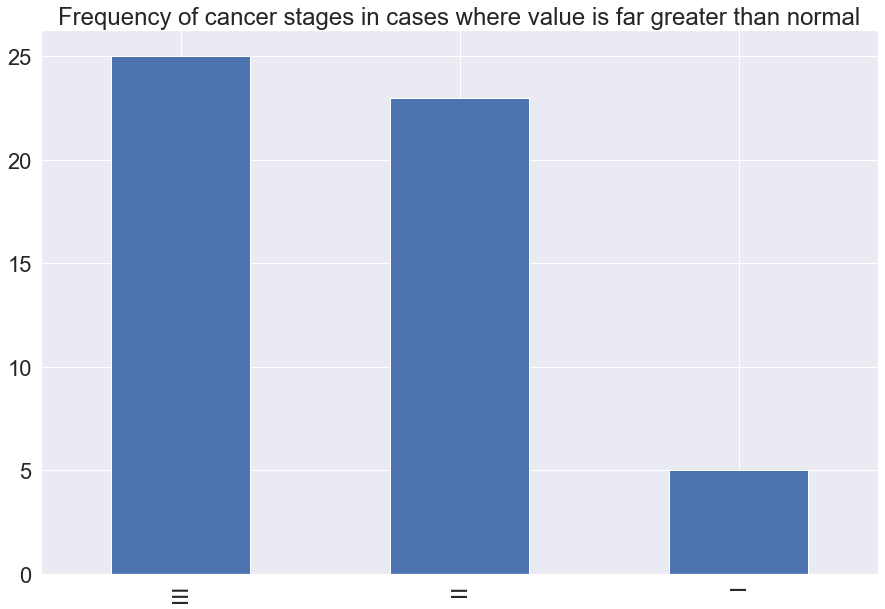

In [68]:
Breast_cancer[Breast_cancer["CA-15-3(U/ml)"] >= 21.15]["AJCC_Stage"].value_counts().plot.bar(figsize=(15, 10),title='Frequency of cancer stages in cases where value is far greater than normal')

In [69]:
Breast_cancer["CEA(pg/ml)"].describe()

count       209.000000
mean       2842.607368
std       23346.741311
min           1.000000
25%         450.000000
50%         744.990000
75%        1410.340000
max      337245.426000
Name: CEA(pg/ml), dtype: float64

In [70]:
Normal=data[data['Tumor_type'] == 'Normal']
Normal["CEA(pg/ml)"].describe()

count     812.000000
mean      931.507845
std       815.704544
min         1.000000
25%       461.495000
50%       707.910000
75%      1161.912500
max      7377.640000
Name: CEA(pg/ml), dtype: float64

* From the above results, there are 209 cases for breast cancer for the tumor type of 'CEA (pg/ml)' and the maximum value is 337245.42 when for normal case is 7377.64.

In [71]:
Breast_cancer[Breast_cancer["CEA(pg/ml)"] > 1410.34]["AJCC_Stage"].value_counts()

II     27
III    14
I      11
Name: AJCC_Stage, dtype: int64

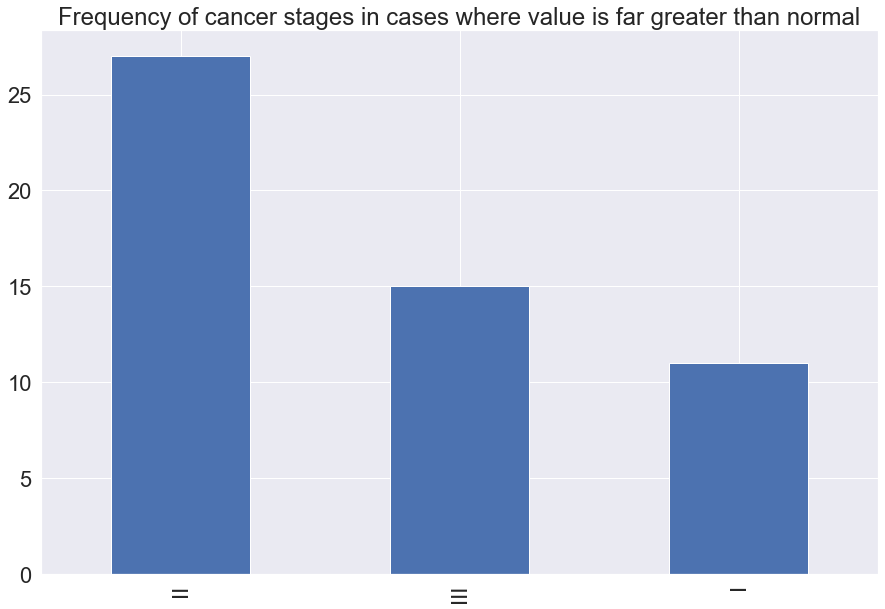

In [72]:
Breast_cancer[Breast_cancer["CEA(pg/ml)"] >= 1410.34]["AJCC_Stage"].value_counts().plot.bar(figsize=(15, 10),title='Frequency of cancer stages in cases where value is far greater than normal')

### Esophagus Cancer

* For Esophagus cancer, there are two protien markers associated with it. They are 'CEA (pg/ml)' and 'CYFRA 21-1 (pg/ml)'.
  CEA/CA19-9  are important protiens biomarkers

In [73]:
Esophagus_cancer=data[data['Tumor_type'] == 'Esophagus']
Esophagus_cancer.head()

,Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,Age,Sex,Race,Histopathology,Plasma_volume(mL),Plasma_DNA_concentration(ng/mL),...,sEGFR(pg/ml),sFas(pg/ml),SHBG(nM),sHER2/sEGFR2/sErbB2(pg/ml),sPECAM-1(pg/ml),TGFa(pg/ml),Thrombospondin-2(pg/ml),TIMP-1(pg/ml),TIMP-2(pg/ml),Target
144,INDI 076,INDI 076 PLS 1,Esophagus,II,49,Male,Black,Squamous cell carcinoma,7.5,5.19,...,775.54,2198.53,21.35,3169.33,4242.81,16.152,2020.51,58878.61,27120.10,positive
175,INDI 112,INDI 112 PLS 1,Esophagus,II,66,Male,Asian,Squamous cell carcinoma,7.5,30.29,...,431.47,233.82,52.95,3551.55,5265.39,16.152,2020.51,205865.48,30088.66,positive
178,INDI 119,INDI 119 PLS 1,Esophagus,I,46,Male,Asian,Adenocarcinoma,7.5,53.59,...,411.26,203.91,22.74,4576.88,6330.30,64.780,2681.30,146501.50,32264.93,positive
184,INDI 125,INDI 125 PLS 1,Esophagus,II,55,Male,Asian,Squamous cell carcinoma,7.5,23.56,...,597.47,876.29,19.82,3306.27,5085.09,16.152,3297.00,132467.33,30088.66,positive
191,INDI 132,INDI 132 PLS 1,Esophagus,III,64,Male,Asian,Squamous cell carcinoma,7.5,29.99,...,700.36,497.37,50.42,2212.93,3005.47,36.840,2173.56,154617.01,36026.64,positive


In [74]:
Esophagus_cancer["CEA(pg/ml)"].describe()

count       45.000000
mean      1572.910356
std       5150.272693
min          1.000000
25%          2.000000
50%        557.000000
75%        931.200000
max      34275.610000
Name: CEA(pg/ml), dtype: float64

In [75]:
Normal=data[data['Tumor_type'] == 'Normal']
Normal["CEA(pg/ml)"].describe()

count     812.000000
mean      931.507845
std       815.704544
min         1.000000
25%       461.495000
50%       707.910000
75%      1161.912500
max      7377.640000
Name: CEA(pg/ml), dtype: float64

* From the above results, there are 45 cases for Esophagus cancer for the tumor type of 'CEA (pg/ml)' and the maximum value is 34275.61 when for normal case is 7377.64.

In [76]:
Esophagus_cancer[Esophagus_cancer["CEA(pg/ml)"] > 931.2]["AJCC_Stage"].value_counts()

II     7
III    2
I      2
Name: AJCC_Stage, dtype: int64

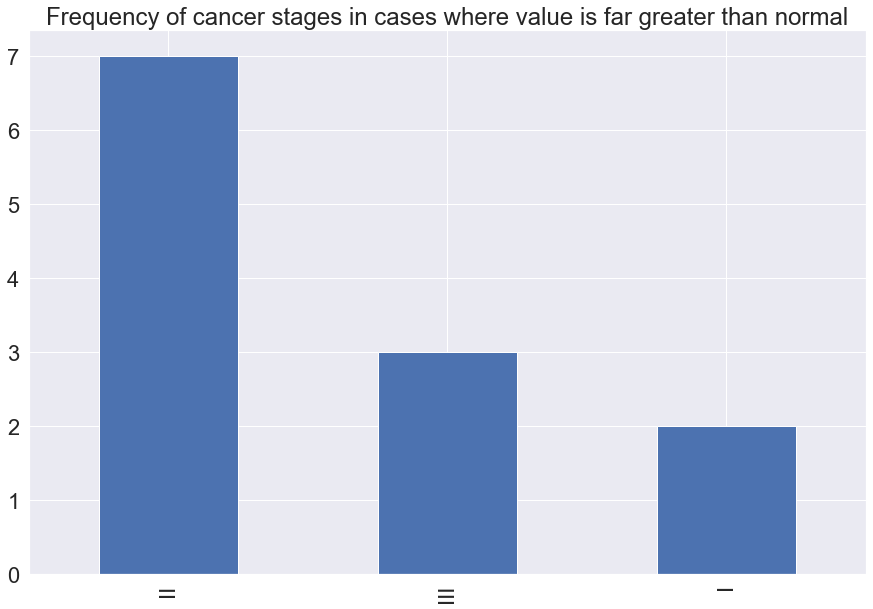

In [77]:
Esophagus_cancer[Esophagus_cancer["CEA(pg/ml)"] >= 931.2]["AJCC_Stage"].value_counts().plot.bar(figsize=(15, 10),title='Frequency of cancer stages in cases where value is far greater than normal')

In [78]:
Esophagus_cancer["CYFRA-21-1(pg/ml)"].describe()

count       45.000000
mean      4802.119733
std       5512.351882
min       1876.758000
25%       1967.502000
50%       2349.000000
75%       4304.340000
max      31071.180000
Name: CYFRA-21-1(pg/ml), dtype: float64

In [79]:
Normal=data[data['Tumor_type'] == 'Normal']
Normal["CYFRA-21-1(pg/ml)"].describe()

count      812.000000
mean      2072.218266
std        657.480682
min       1816.458000
25%       1942.470000
50%       1994.874000
75%       2008.290000
max      13499.000000
Name: CYFRA-21-1(pg/ml), dtype: float64

* From the above results, there are 45 cases for Esophagus cancer for the tumor marker type of 'CYFRA 21-1 (pg/ml)' and the maximum value is 31071.18 when for normal case is 13499.

In [80]:
Esophagus_cancer[Esophagus_cancer["CYFRA-21-1(pg/ml)"] > 4304.34]["AJCC_Stage"].value_counts()

II     8
III    2
I      1
Name: AJCC_Stage, dtype: int64

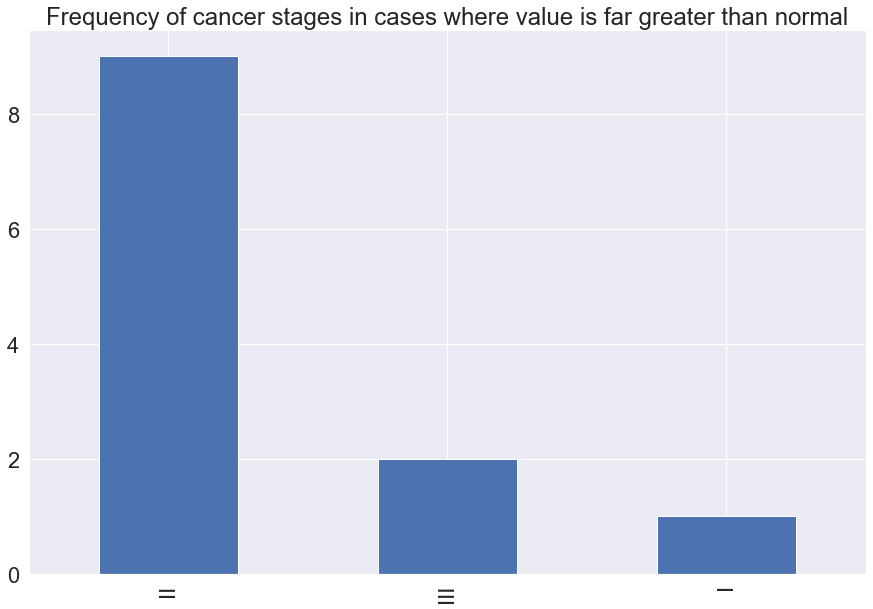

In [81]:
Esophagus_cancer[Esophagus_cancer["CYFRA-21-1(pg/ml)"] >= 4304.34]["AJCC_Stage"].value_counts().plot.bar(figsize=(15, 10),title='Frequency of cancer stages in cases where value is far greater than normal')

### Liver Cancer

* For Liver cancer, the tumor marker associated with it is 'AFP (pg/ml)'. 

In [82]:
Liver_cancer=data[data['Tumor_type'] == 'Liver']
Liver_cancer.head()

,Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,Age,Sex,Race,Histopathology,Plasma_volume(mL),Plasma_DNA_concentration(ng/mL),...,sEGFR(pg/ml),sFas(pg/ml),SHBG(nM),sHER2/sEGFR2/sErbB2(pg/ml),sPECAM-1(pg/ml),TGFa(pg/ml),Thrombospondin-2(pg/ml),TIMP-1(pg/ml),TIMP-2(pg/ml),Target
145,INDI 077,INDI 077 PLS 1,Liver,II,77,Male,Caucasian,Hepatocellular carcinoma,7.5,62.35,...,726.77,2401.380,39.32,6060.80,6372.83,16.152,7945.950,150551.59,38711.14,positive
146,INDI 078,INDI 078 PLS 1,Liver,II,56,Male,Caucasian,Hepatocellular carcinoma,7.5,47.19,...,743.16,1180.960,207.34,4975.76,4698.34,16.152,10282.100,48099.87,24840.11,positive
147,INDI 079,INDI 079 PLS 1,Liver,II,42,Male,Asian,Hepatocellular carcinoma,7.5,44.38,...,2410.89,421.210,10.83,5612.85,5825.51,16.152,25272.120,102897.67,26922.04,positive
148,INDI 080,INDI 080 PLS 1,Liver,I,70,Male,Asian,Hepatocellular carcinoma,7.5,5.76,...,668.66,202.158,107.28,6935.33,5218.19,16.104,2229.275,76849.55,67225.11,positive
188,INDI 129,INDI 129 PLS 1,Liver,II,63,Female,Asian,Hepatocellular carcinoma,7.5,80.95,...,293.12,2054.750,42.17,4546.75,6383.08,16.770,2173.560,63685.39,24648.53,positive


In [83]:
Liver_cancer["AFP(pg/ml)"].describe()

count        44.000000
mean     188641.763818
std      260349.277424
min         792.540000
25%        1481.337500
50%        9437.215000
75%      592839.507000
max      600608.892000
Name: AFP(pg/ml), dtype: float64

In [84]:
Normal=data[data['Tumor_type'] == 'Normal']
Normal["AFP(pg/ml)"].describe()

count       812.000000
mean       1667.793973
std        6125.335545
min         740.016000
25%         798.941500
50%         895.128000
75%        1545.597500
max      171255.750000
Name: AFP(pg/ml), dtype: float64

* From the above results, there are 44 cases for Liver cancer for the tumor marker type of 'AFP (pg/ml)' and the maximum value is 600608.892 when for normal case is 171255.75.

In [85]:
Liver_cancer[Liver_cancer["AFP(pg/ml)"] > 592839.507]["AJCC_Stage"].value_counts()

III    6
II     4
I      1
Name: AJCC_Stage, dtype: int64

* There are 6 cases for third stage of Liver cancer with tumor marker type of 'AFP (pg/ml)' and 4 cases of second stage and 1 case of first stage.

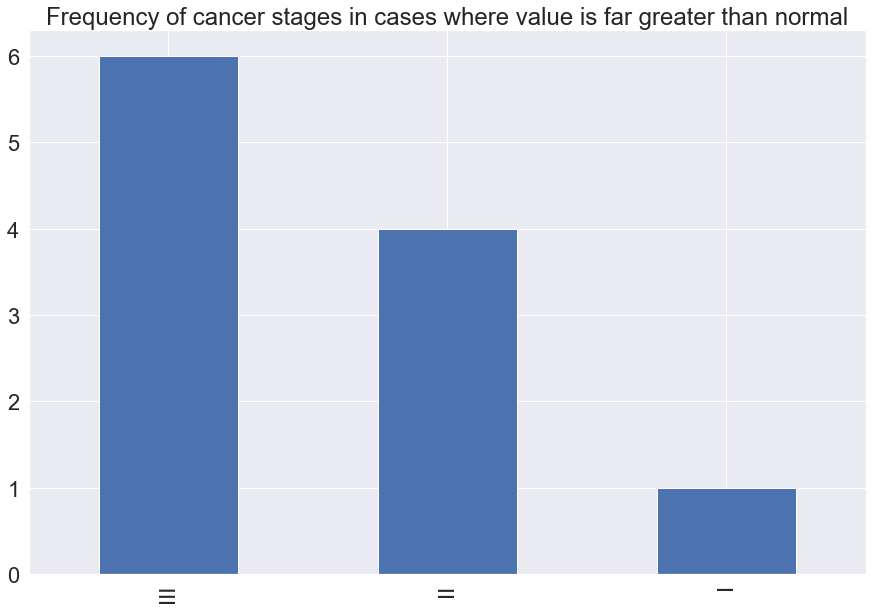

In [86]:
Liver_cancer[Liver_cancer["AFP(pg/ml)"] >= 592839.507]["AJCC_Stage"].value_counts().plot.bar(figsize=(15, 10),title='Frequency of cancer stages in cases where value is far greater than normal')

### Stomach Cancer

* For Stomach cancer, the tumor markers associated with it are 'CA19-9 (U/ml)' and 'CEA (pg/ml)'. 

In [87]:
Stomach_cancer=data[data['Tumor_type'] == 'Stomach']
Stomach_cancer.head()

,Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,Age,Sex,Race,Histopathology,Plasma_volume(mL),Plasma_DNA_concentration(ng/mL),...,sEGFR(pg/ml),sFas(pg/ml),SHBG(nM),sHER2/sEGFR2/sErbB2(pg/ml),sPECAM-1(pg/ml),TGFa(pg/ml),Thrombospondin-2(pg/ml),TIMP-1(pg/ml),TIMP-2(pg/ml),Target
150,INDI 082,INDI 082 PLS 1,Stomach,II,80,Male,Asian,Adenocarcinoma,7.5,6.57,...,1414.100,202.158,110.38,4954.64,2957.21,16.104,2229.275,79027.78,61830.32,positive
151,INDI 083,INDI 083 PLS 1,Stomach,II,50,Male,Asian,Adenocarcinoma,7.5,5.25,...,968.460,744.030,84.52,3927.10,3721.59,16.152,8667.060,80544.65,25435.43,positive
152,INDI 084,INDI 084 PLS 1,Stomach,II,78,Female,Asian,Adenocarcinoma,7.5,19.44,...,774.210,1080.340,73.43,2781.63,2479.29,16.152,3621.580,28157.71,24393.30,positive
153,INDI 085,INDI 085 PLS 1,Stomach,I,61,Male,Asian,Adenocarcinoma,7.5,2.27,...,198.065,203.910,32.05,2747.19,2392.40,19.980,2020.510,35027.41,25881.65,positive
154,INDI 086,INDI 086 PLS 1,Stomach,I,50,Male,Asian,Adenocarcinoma,7.5,34.92,...,589.980,1384.460,36.37,3381.77,3772.22,52.680,2867.140,166373.66,32215.45,positive


In [88]:
Stomach_cancer["CA19-9(U/ml)"].describe()

count      68.000000
mean      183.929706
std      1164.138161
min        15.798000
25%        16.380000
50%        17.490000
75%        19.492500
max      9615.690000
Name: CA19-9(U/ml), dtype: float64

In [89]:
Normal=data[data['Tumor_type'] == 'Normal']
Normal["CA19-9(U/ml)"].describe()

count    812.000000
mean      18.160574
std        5.845748
min       14.214000
25%       16.278000
50%       16.398000
75%       16.602000
max       70.350000
Name: CA19-9(U/ml), dtype: float64

* From the above results, there are 68 cases for stomach cancer for the tumor marker type of 'CA19-9 (U/ml)' and the maximum value is 9615.69 when for normal case is 70.35.

In [90]:
Stomach_cancer[Stomach_cancer["CA19-9(U/ml)"] > 19.4925]["AJCC_Stage"].value_counts()

II     9
I      4
III    4
Name: AJCC_Stage, dtype: int64

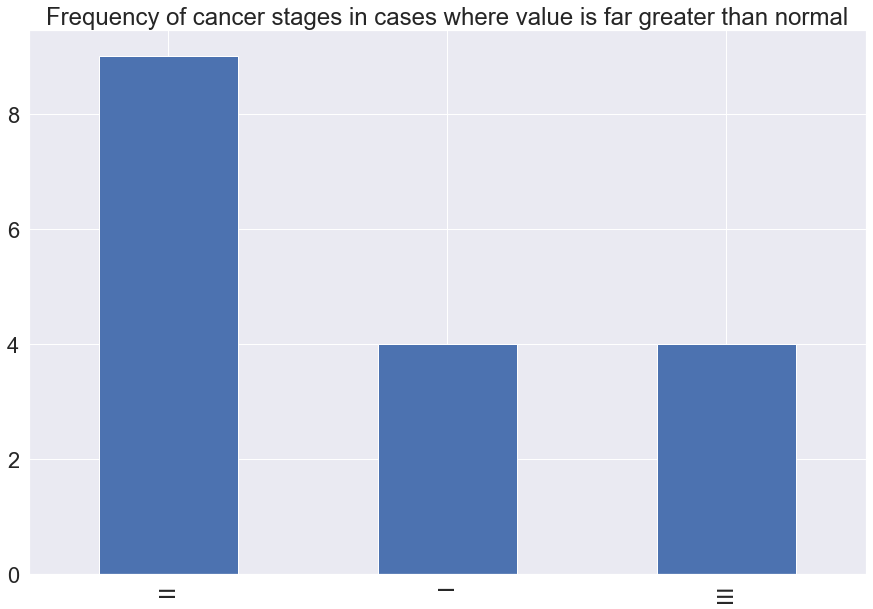

In [91]:
Stomach_cancer[Stomach_cancer["CA19-9(U/ml)"] >= 19.4925]["AJCC_Stage"].value_counts().plot.bar(figsize=(15, 10),title='Frequency of cancer stages in cases where value is far greater than normal')

In [92]:
Stomach_cancer["CEA(pg/ml)"].describe()

count        68.000000
mean      10537.815941
std       57157.478165
min           1.000000
25%           9.500000
50%         490.865000
75%         917.340000
max      336427.986000
Name: CEA(pg/ml), dtype: float64

In [93]:
Normal=data[data['Tumor_type'] == 'Normal']
Normal["CEA(pg/ml)"].describe()

count     812.000000
mean      931.507845
std       815.704544
min         1.000000
25%       461.495000
50%       707.910000
75%      1161.912500
max      7377.640000
Name: CEA(pg/ml), dtype: float64

* From the above results, there are 68 cases for stomach cancer for the tumor marker type of 'CEA (pg/ml)' and the maximum value is 336427.986 when for normal case is 7377.64.

In [94]:
Stomach_cancer[Stomach_cancer["CEA(pg/ml)"] > 917.34]["AJCC_Stage"].value_counts()

I      7
II     7
III    3
Name: AJCC_Stage, dtype: int64

* There are 3 cases for third stage of Stomach cancer with tumor marker type of 'CEA (pg/ml)' and 7 cases of second stage and 7 cases of first stage.

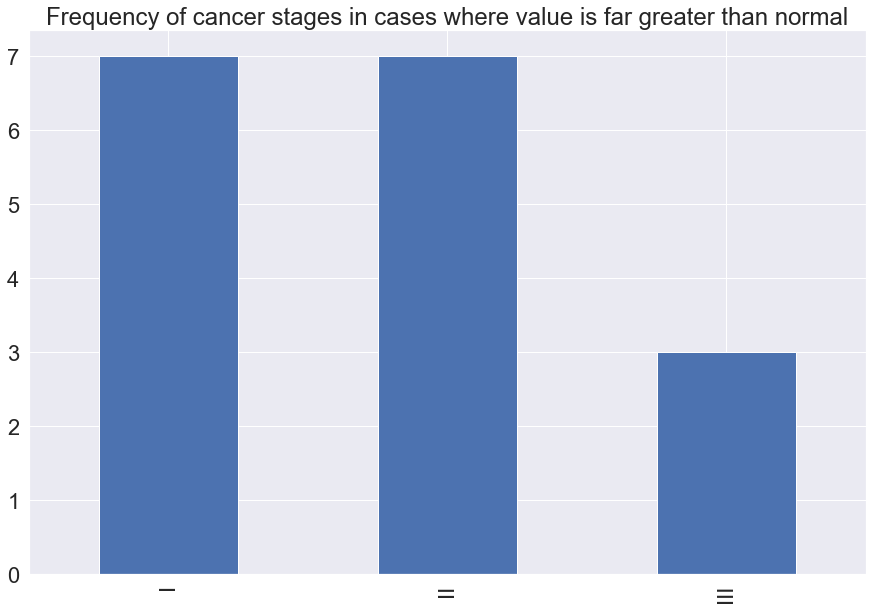

In [95]:
Stomach_cancer[Stomach_cancer["CEA(pg/ml)"] >= 917.34]["AJCC_Stage"].value_counts().plot.bar(figsize=(15, 10),title='Frequency of cancer stages in cases where value is far greater than normal')

### Lung Cancer

Key protein associated with lung cancer is CYFRA 21-1 (pg/ml).The levels of CYFRA 21-1 were 1.66 ± 0.12 ng/ml for p-stage I, 1.72 ± 0.15 ng/ml for p-stage II, 1.20 ± 0.11 ng/ml for p-stage IIIA, 2.19 ± 0.37 ng/ml for p-stage IIIB, and 0.75 ± 0.25 ng/ml for p-stage IV

In [96]:
Lung_cancer=data[data['Tumor_type'] == 'Lung']
Lung_cancer.head()

,Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,Age,Sex,Race,Histopathology,Plasma_volume(mL),Plasma_DNA_concentration(ng/mL),...,sEGFR(pg/ml),sFas(pg/ml),SHBG(nM),sHER2/sEGFR2/sErbB2(pg/ml),sPECAM-1(pg/ml),TGFa(pg/ml),Thrombospondin-2(pg/ml),TIMP-1(pg/ml),TIMP-2(pg/ml),Target
76,INDI 001,INDI 001 PLS 1,Lung,II,70,Female,Caucasian,Non-small cell lung cancer,7.5,2.44,...,2605.02,202.158,57.45,5084.34,6154.94,16.104,6264.920,136363.01,57377.78,positive
77,INDI 002,INDI 002 PLS 1,Lung,II,55,Female,Caucasian,Non-small cell lung cancer,7.5,0.86,...,2591.28,202.158,172.90,5778.95,5027.85,16.104,5095.230,72112.49,59669.66,positive
78,INDI 003,INDI 003 PLS 1,Lung,III,78,Male,Caucasian,Non-small cell lung cancer,7.5,2.72,...,1121.94,202.158,78.68,4853.14,5082.54,16.104,2229.275,73931.88,59388.49,positive
79,INDI 004,INDI 004 PLS 1,Lung,I,75,Male,Caucasian,Non-small cell lung cancer,7.5,2.43,...,2420.07,202.158,77.90,6935.33,5545.11,16.104,2229.275,86067.68,57704.59,positive
80,INDI 005,INDI 005 PLS 1,Lung,I,70,Male,Caucasian,Non-small cell lung cancer,7.5,3.15,...,1370.84,202.158,160.47,2106.35,4710.58,16.104,2229.275,81139.74,66179.40,positive


In [97]:
Lung_cancer["CYFRA-21-1(pg/ml)"].describe() 
# 1635 and 1460 pg/mL,  

count      104.000000
mean      3880.063712
std       3778.862904
min       1895.694000
25%       1965.636000
50%       1988.196000
75%       6202.710000
max      33810.210000
Name: CYFRA-21-1(pg/ml), dtype: float64

In [98]:
Normal=data[data['Tumor_type'] == 'Normal']
Normal["CYFRA-21-1(pg/ml)"].describe()

count      812.000000
mean      2072.218266
std        657.480682
min       1816.458000
25%       1942.470000
50%       1994.874000
75%       2008.290000
max      13499.000000
Name: CYFRA-21-1(pg/ml), dtype: float64

In [99]:
Lung_cancer[Lung_cancer["CYFRA-21-1(pg/ml)"] > 1540]["AJCC_Stage"].value_counts()

I      46
III    31
II     27
Name: AJCC_Stage, dtype: int64

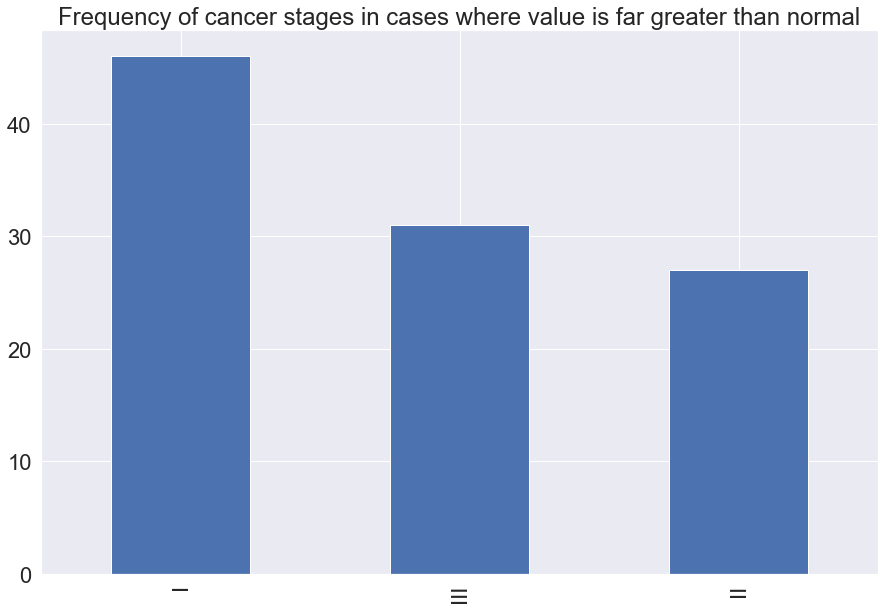

In [100]:
Lung_cancer[Lung_cancer["CYFRA-21-1(pg/ml)"] > 1540]["AJCC_Stage"].value_counts().plot.bar(figsize=(15, 10),title='Frequency of cancer stages in cases where value is far greater than normal')

Maximum cases are of stage 1 cancer.